I refered 'GAN Introduction' of  Nanashi-san.
https://www.kaggle.com/code/jesucristo/gan-introduction/notebook
Thank you very much for sharing impressive introduction.

For the first time, I tried GANs. So it is not enough and I need more learning. I appreciate it if I can get your feedback.

In my notebook 'How can we detect proliferative retinopathy ?'(https://www.kaggle.com/code/sasakitetsuya/how-can-we-detect-proliferative-retinopathy),
I tried detection model for proliferative retinopathy. But it is not still enough and need some improvement.

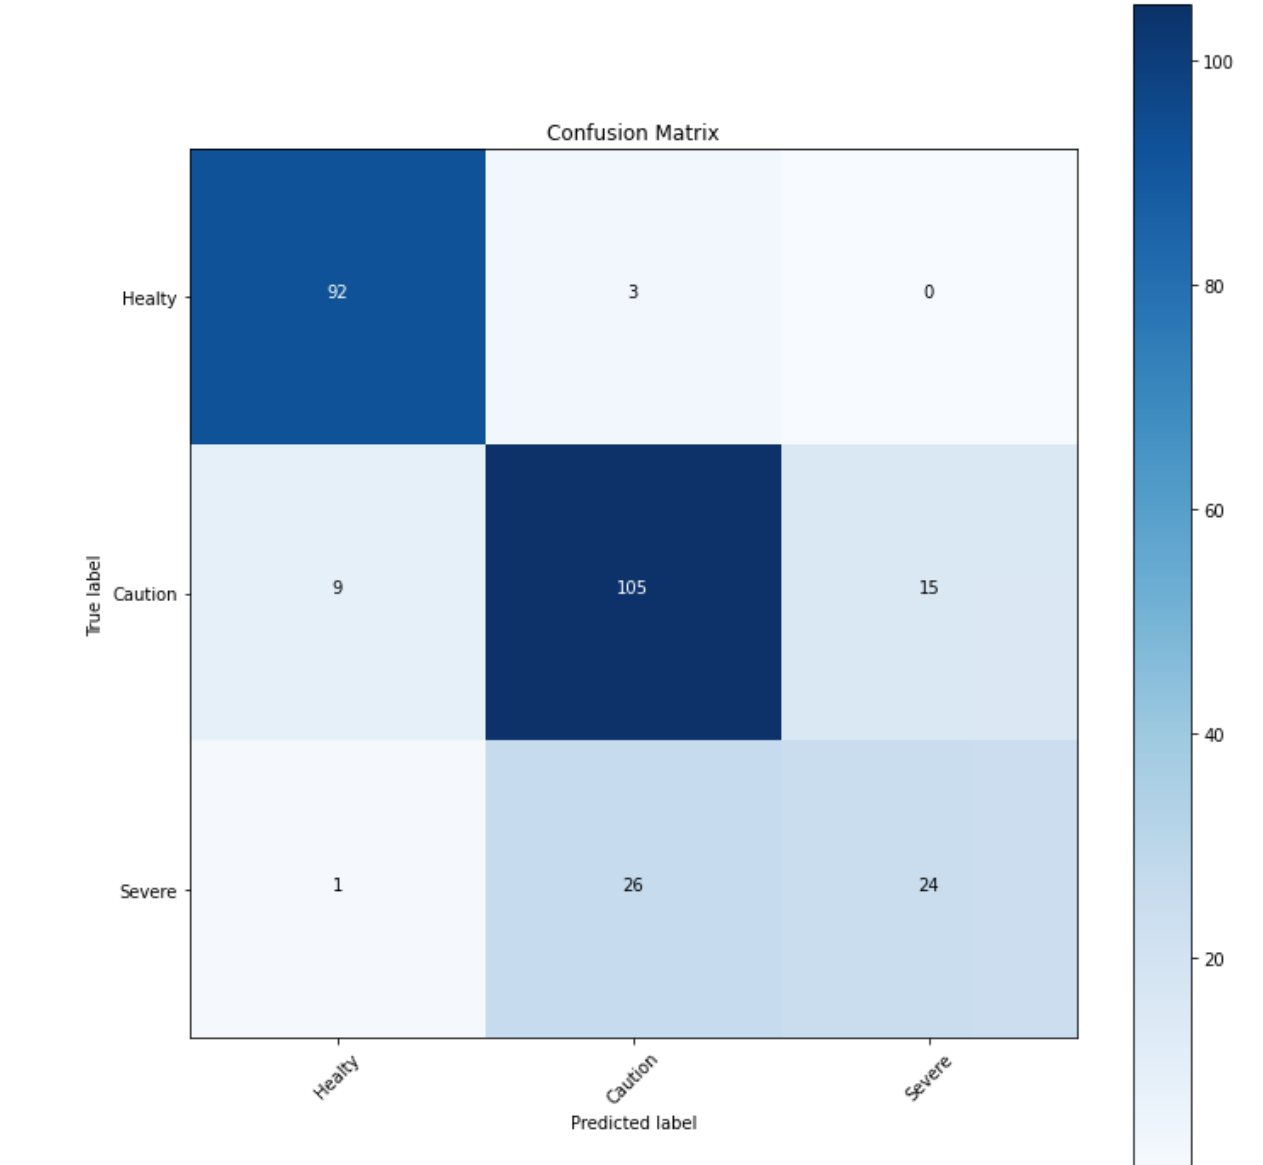

Especially, 'Recall' of 'Caution' and 'Severe' condition is low, although the most important thing is how we do not miss 'Caution' and 'Severe'. On the other hand, I happened to read the article 'Data augmentation using generative adversarial networks (CycleGAN) to improve generalizability in CT segmentation tasks'(https://www.nature.com/articles/s41598-019-52737-x). According to this article,

"Labeled medical imaging data is scarce and expensive to generate. To achieve generalizable deep learning models large amounts of data are needed. Standard data augmentation is a method to increase generalizability and is routinely performed. Generative adversarial networks offer a novel method for data augmentation."

Actually, this kind of technology is still expensive for small hospitals, some area or countries etc... and it may cause health gap. But it means that if this kind of tech spread widely, it will reduce health gap, improve the productivity of medical examination and save a lot of people.

So I tried GAN to confirm how it works, although it is still not enough and I need more learning....

# Importing

In [5]:
import os
print(os.listdir("/Users/amogh/Edi test/train/"))

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [6]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

import time
import random
import glob

import cv2
from PIL import Image

ModuleNotFoundError: No module named 'torchvision'

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Sample Images

In [12]:
import matplotlib.pyplot as plt

* Healthy

In [13]:
import numpy as np

There are 212 pictures of Healthy.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/amogh/Edi test/train/Urticaria Hivesangioedema-9.jpg'

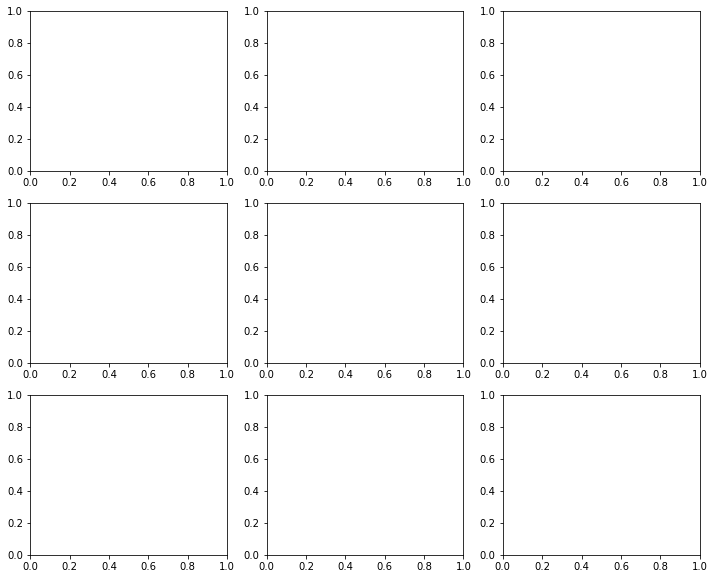

In [14]:
PATH1 
images = os.listdir(PATH1)
print(f'There are {len(os.listdir(PATH1))} pictures of Healthy.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH1)))
    img = plt.imread(PATH1 + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

* Severe

There are 190 pictures of severeDR.


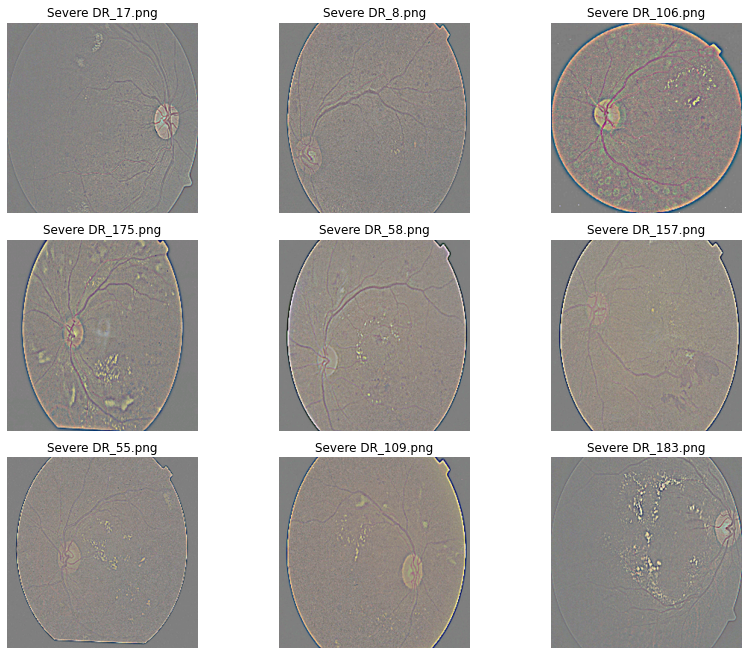

In [4]:
PATH2 = '../input/diabetic-retinopathy-dataset/Severe DR/'
images2 = os.listdir(PATH2)
print(f'There are {len(os.listdir(PATH2))} pictures of severeDR.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH2)))
    img = plt.imread(PATH2 + images2[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images2[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Image Preprocessing

In [15]:
batch_size = 32
batchSize = 64
imageSize = 64

# 64x64 images!
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('/Users/amogh/Edi test/train/Urticaria Hives', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(dataloader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

NameError: name 'transforms' is not defined

In [6]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_data = datasets.ImageFolder('', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)
                                           
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 2750
    Root location: ../input/diabetic-retinopathy-dataset/
    StandardTransform
Transform: Compose(
               Resize(size=64, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(64, 64))
               RandomHorizontalFlip(p=0.5)
               RandomApply(
               p=0.2
               ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
           )
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

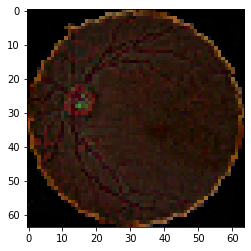

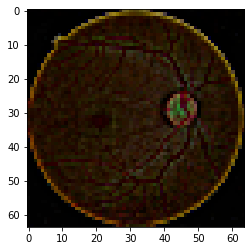

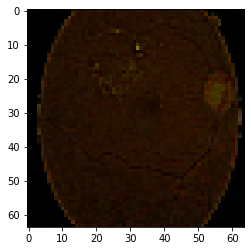

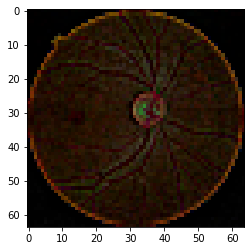

In [8]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

# Weights

In [9]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generator

In [10]:
class G(nn.Module):
    def __init__(self):
        super(G, self).__init__()
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output

netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Discriminator

In [11]:
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output.view(-1)
    
netD = D()
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [12]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()
        
        self.nz = nz
        self.channels = channels
        
        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img

    
class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()
        
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)
    
        return out.view(-1, 1)

# Training

In [13]:
!mkdir results
!ls

__notebook__.ipynb  results


In [14]:
EPOCH = 1
LR = 0.0001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [15]:
for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()
        
        real,_ = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)
        
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)
        
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()
        
        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        
        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)

[0/1][0/86] Loss_D: 1.9865; Loss_G: 1.9425
[0/1][1/86] Loss_D: 1.0843; Loss_G: 2.6494
[0/1][2/86] Loss_D: 0.9953; Loss_G: 3.1917
[0/1][3/86] Loss_D: 0.3463; Loss_G: 4.0175
[0/1][4/86] Loss_D: 0.2986; Loss_G: 4.0825
[0/1][5/86] Loss_D: 0.2677; Loss_G: 3.8815
[0/1][6/86] Loss_D: 0.2384; Loss_G: 3.8972
[0/1][7/86] Loss_D: 0.6131; Loss_G: 3.8950
[0/1][8/86] Loss_D: 0.8386; Loss_G: 4.0827
[0/1][9/86] Loss_D: 0.2524; Loss_G: 4.4353
[0/1][10/86] Loss_D: 0.2426; Loss_G: 4.4864
[0/1][11/86] Loss_D: 0.5379; Loss_G: 4.1070
[0/1][12/86] Loss_D: 0.4384; Loss_G: 4.2259
[0/1][13/86] Loss_D: 0.2816; Loss_G: 4.8940
[0/1][14/86] Loss_D: 0.2872; Loss_G: 4.7997
[0/1][15/86] Loss_D: 0.2622; Loss_G: 4.5556
[0/1][16/86] Loss_D: 0.4019; Loss_G: 4.5805
[0/1][17/86] Loss_D: 0.5738; Loss_G: 4.6395
[0/1][18/86] Loss_D: 0.3092; Loss_G: 5.3186
[0/1][19/86] Loss_D: 0.2846; Loss_G: 4.8425
[0/1][20/86] Loss_D: 0.2236; Loss_G: 5.1857
[0/1][21/86] Loss_D: 0.2972; Loss_G: 5.4365
[0/1][22/86] Loss_D: 0.1660; Loss_G: 4.982

In [16]:
batch_size = 32
LR_G = 0.0005
LR_D = 0.0001

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

In [18]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [19]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)
    
    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/86 [00:00<?, ?it/s]

[1/100][43/86] Loss_D: 1.5209 Loss_G: 2.1012 D(x): 0.4131 D(G(z)): 0.4252 / 0.0981
[1/100][86/86] Loss_D: 1.5107 Loss_G: 2.1244 D(x): 0.4669 D(G(z)): 0.4231 / 0.0957


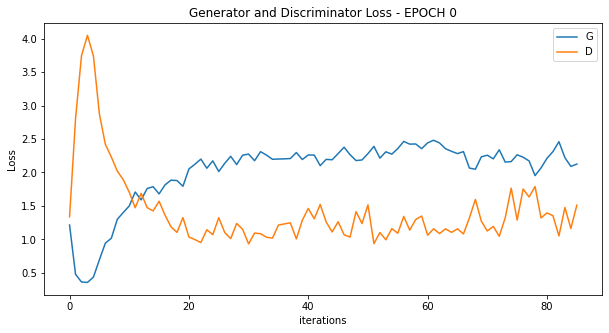

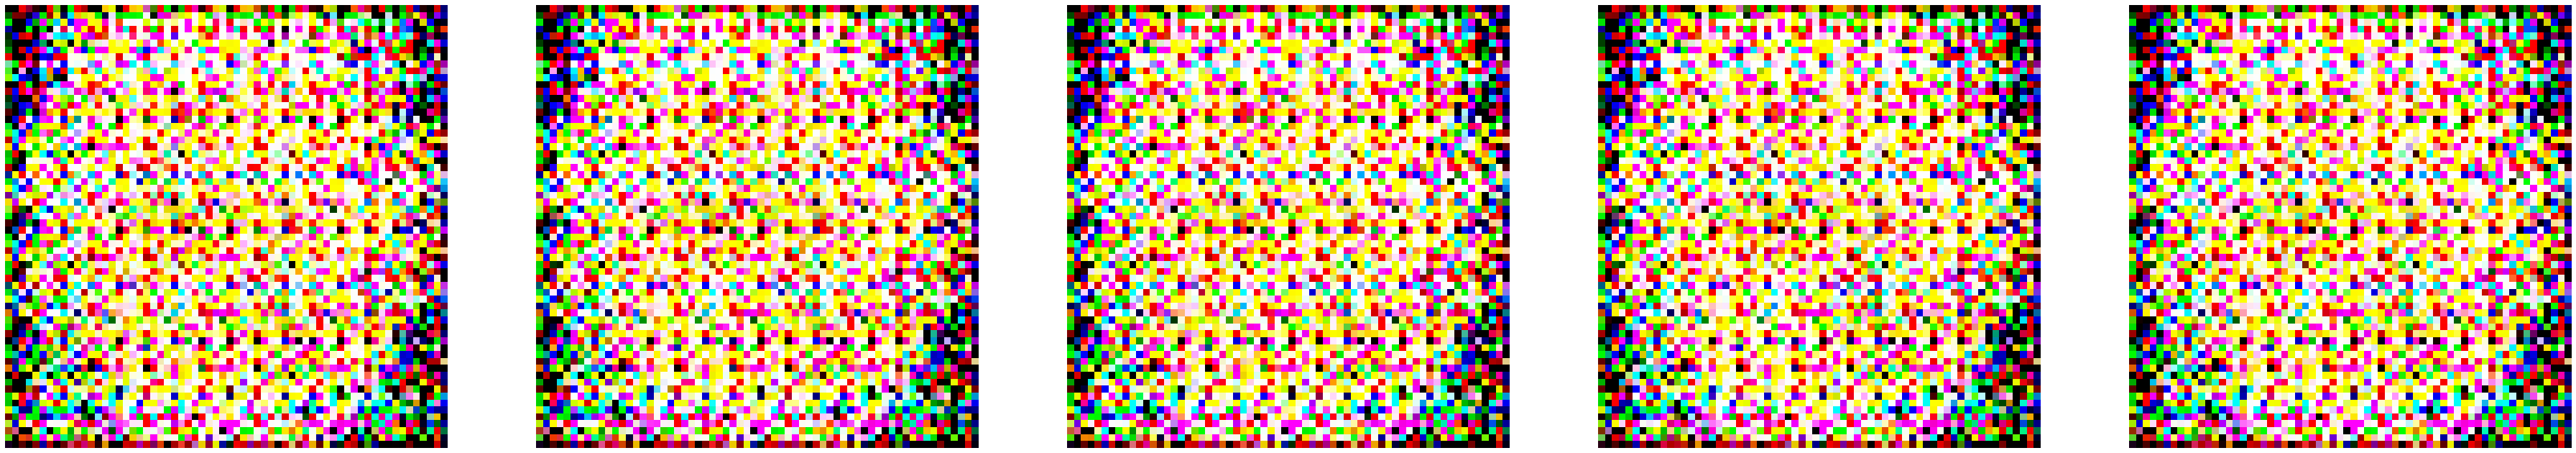

  0%|          | 0/86 [00:00<?, ?it/s]

[2/100][43/86] Loss_D: 0.8886 Loss_G: 1.8754 D(x): 0.6021 D(G(z)): 0.2802 / 0.1265
[2/100][86/86] Loss_D: 0.8197 Loss_G: 2.2171 D(x): 0.6006 D(G(z)): 0.1771 / 0.0861


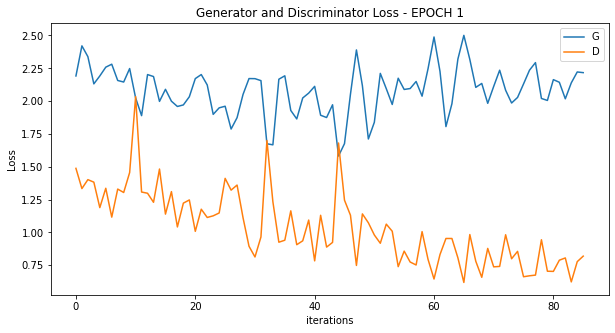

  0%|          | 0/86 [00:00<?, ?it/s]

[3/100][43/86] Loss_D: 0.4857 Loss_G: 2.4258 D(x): 0.7896 D(G(z)): 0.0928 / 0.0681
[3/100][86/86] Loss_D: 0.5664 Loss_G: 2.6276 D(x): 0.7292 D(G(z)): 0.0797 / 0.0545


  0%|          | 0/86 [00:00<?, ?it/s]

[4/100][43/86] Loss_D: 0.6040 Loss_G: 2.3947 D(x): 0.7124 D(G(z)): 0.1416 / 0.0705
[4/100][86/86] Loss_D: 0.4307 Loss_G: 3.0276 D(x): 0.8679 D(G(z)): 0.0856 / 0.0348


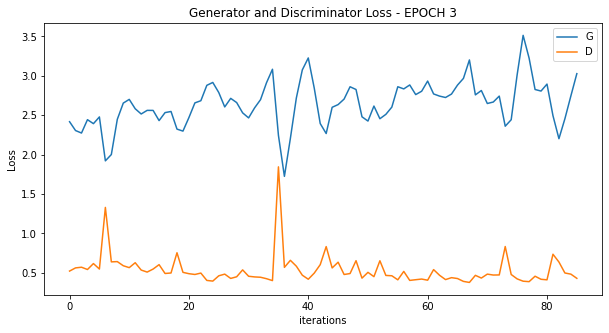

  0%|          | 0/86 [00:00<?, ?it/s]

[5/100][43/86] Loss_D: 0.7649 Loss_G: 2.3993 D(x): 0.8054 D(G(z)): 0.2819 / 0.0702
[5/100][86/86] Loss_D: 0.3956 Loss_G: 3.8481 D(x): 0.7871 D(G(z)): 0.0166 / 0.0140


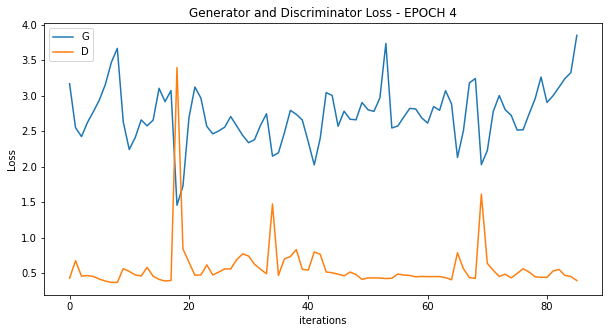

  0%|          | 0/86 [00:00<?, ?it/s]

[6/100][43/86] Loss_D: 0.4498 Loss_G: 2.8345 D(x): 0.8248 D(G(z)): 0.0888 / 0.0432
[6/100][86/86] Loss_D: 0.7714 Loss_G: 2.7718 D(x): 0.6851 D(G(z)): 0.2359 / 0.0479


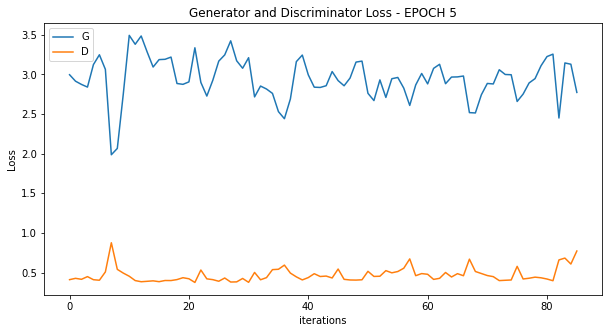

  0%|          | 0/86 [00:00<?, ?it/s]

[7/100][43/86] Loss_D: 0.4277 Loss_G: 3.2417 D(x): 0.8083 D(G(z)): 0.0582 / 0.0280
[7/100][86/86] Loss_D: 0.6639 Loss_G: 2.4886 D(x): 0.6754 D(G(z)): 0.1479 / 0.1217


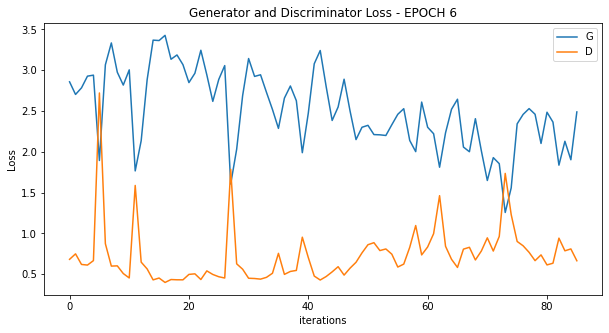

  0%|          | 0/86 [00:00<?, ?it/s]

[8/100][43/86] Loss_D: 0.3987 Loss_G: 2.9736 D(x): 0.8359 D(G(z)): 0.0500 / 0.0438
[8/100][86/86] Loss_D: 1.1531 Loss_G: 1.2418 D(x): 0.5873 D(G(z)): 0.3999 / 0.3123


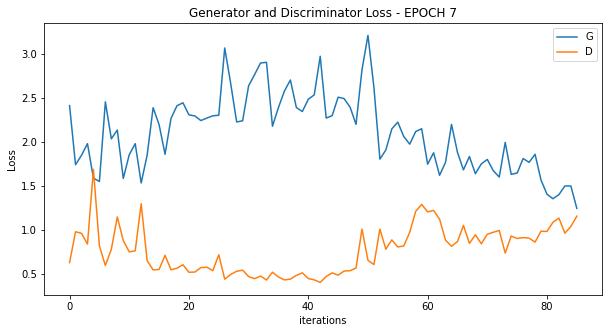

  0%|          | 0/86 [00:00<?, ?it/s]

[9/100][43/86] Loss_D: 1.2865 Loss_G: 1.0618 D(x): 0.4761 D(G(z)): 0.3986 / 0.3271
[9/100][86/86] Loss_D: 1.2524 Loss_G: 0.9380 D(x): 0.5152 D(G(z)): 0.4134 / 0.3798


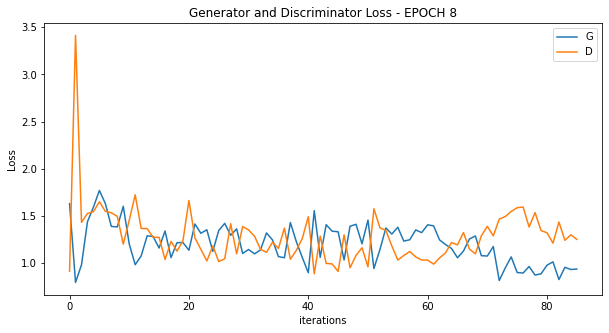

  0%|          | 0/86 [00:00<?, ?it/s]

[10/100][43/86] Loss_D: 0.9283 Loss_G: 1.1450 D(x): 0.7617 D(G(z)): 0.3986 / 0.2978
[10/100][86/86] Loss_D: 1.3503 Loss_G: 1.2486 D(x): 0.4274 D(G(z)): 0.3290 / 0.2807


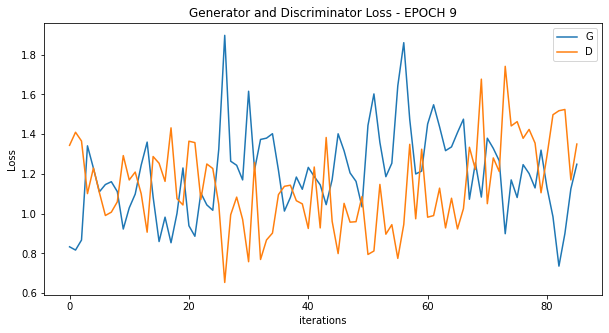

  0%|          | 0/86 [00:00<?, ?it/s]

[11/100][43/86] Loss_D: 1.2425 Loss_G: 1.2859 D(x): 0.4936 D(G(z)): 0.2703 / 0.2656
[11/100][86/86] Loss_D: 1.1866 Loss_G: 0.9477 D(x): 0.5802 D(G(z)): 0.4386 / 0.3761


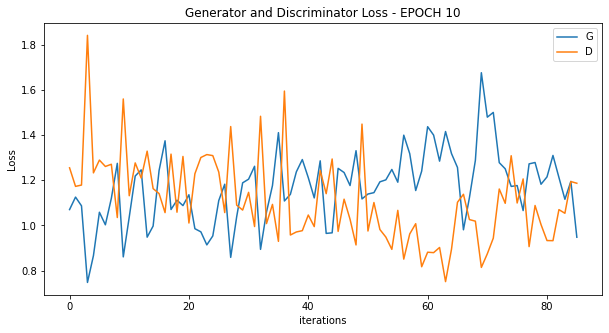

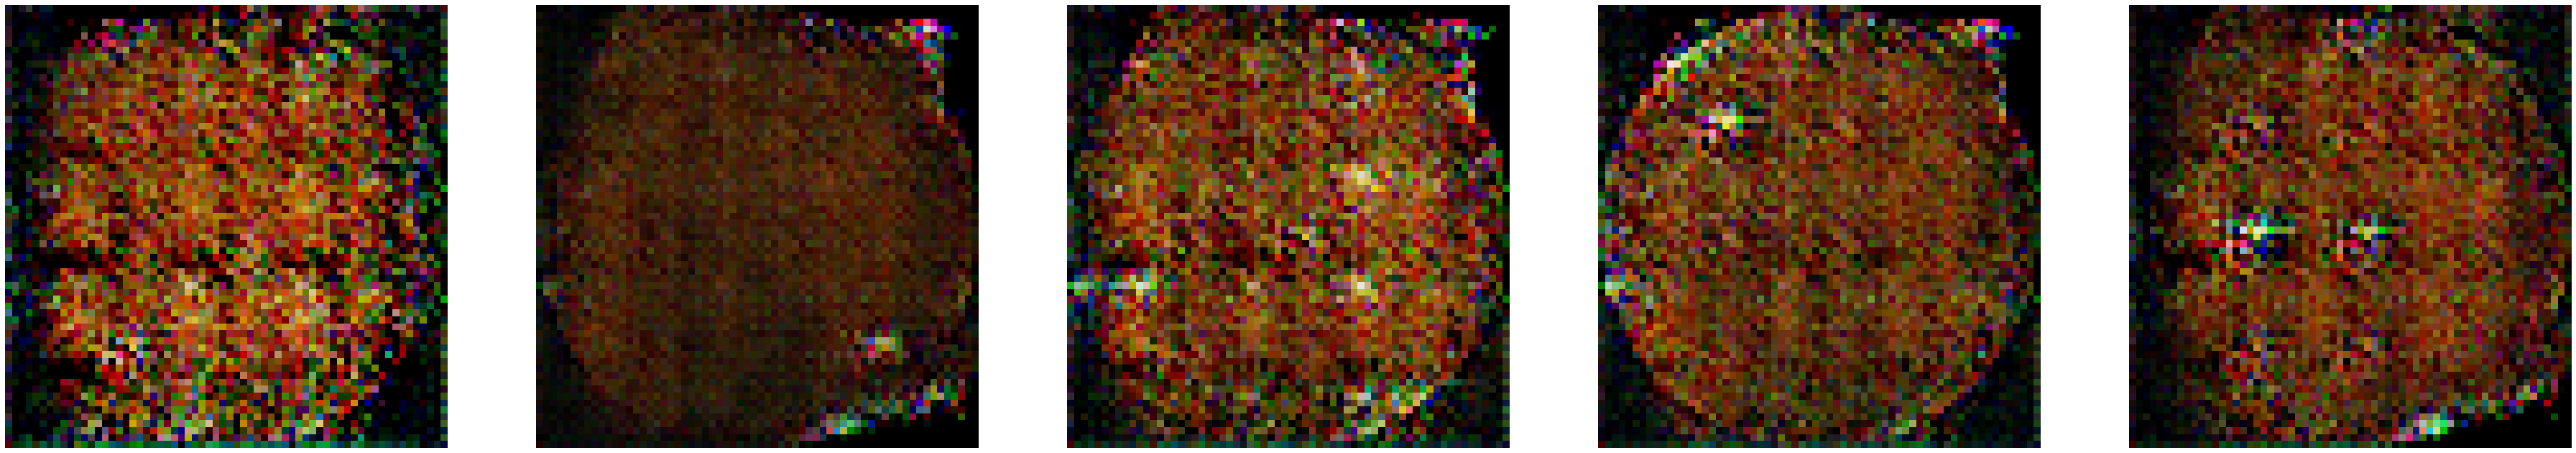

  0%|          | 0/86 [00:00<?, ?it/s]

[12/100][43/86] Loss_D: 0.8871 Loss_G: 1.2920 D(x): 0.7782 D(G(z)): 0.3824 / 0.2508
[12/100][86/86] Loss_D: 0.8237 Loss_G: 1.5186 D(x): 0.5984 D(G(z)): 0.1972 / 0.2029


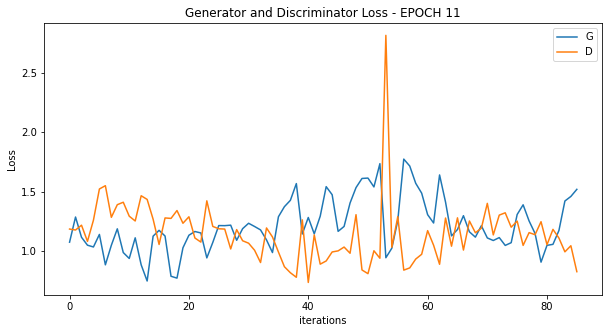

  0%|          | 0/86 [00:00<?, ?it/s]

[13/100][43/86] Loss_D: 1.0333 Loss_G: 1.3071 D(x): 0.5702 D(G(z)): 0.3341 / 0.2829
[13/100][86/86] Loss_D: 0.6896 Loss_G: 1.6530 D(x): 0.6846 D(G(z)): 0.1918 / 0.1754


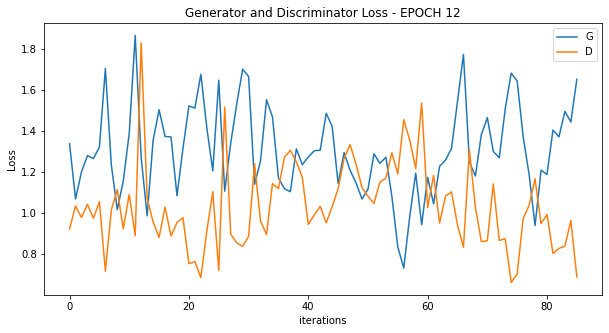

  0%|          | 0/86 [00:00<?, ?it/s]

[14/100][43/86] Loss_D: 1.1490 Loss_G: 1.2722 D(x): 0.4797 D(G(z)): 0.2695 / 0.2731
[14/100][86/86] Loss_D: 1.0754 Loss_G: 1.6815 D(x): 0.4149 D(G(z)): 0.1675 / 0.1697


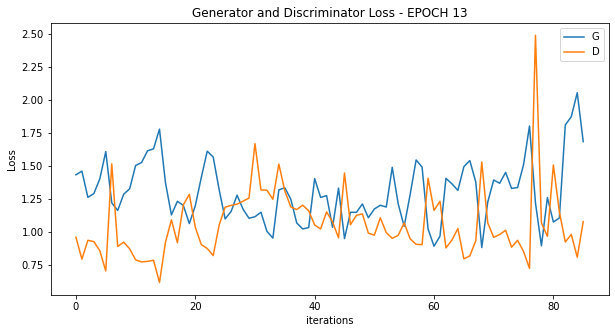

  0%|          | 0/86 [00:00<?, ?it/s]

[15/100][43/86] Loss_D: 1.0657 Loss_G: 1.2801 D(x): 0.5492 D(G(z)): 0.3071 / 0.2917
[15/100][86/86] Loss_D: 0.8975 Loss_G: 1.5320 D(x): 0.5348 D(G(z)): 0.2064 / 0.2092


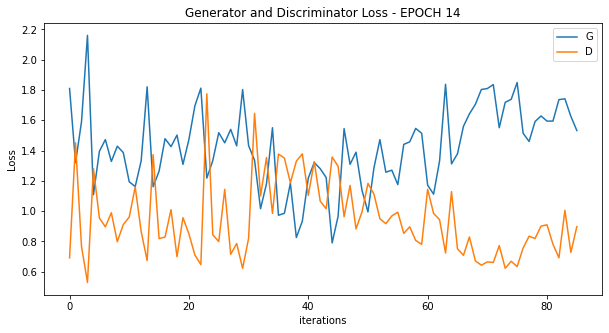

  0%|          | 0/86 [00:00<?, ?it/s]

[16/100][43/86] Loss_D: 0.7475 Loss_G: 1.7080 D(x): 0.6845 D(G(z)): 0.2409 / 0.1854
[16/100][86/86] Loss_D: 0.6718 Loss_G: 1.7322 D(x): 0.7127 D(G(z)): 0.2049 / 0.1685


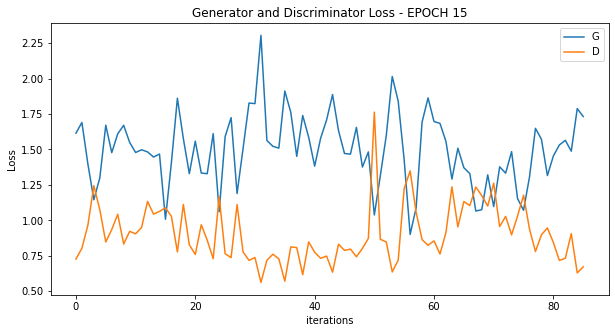

  0%|          | 0/86 [00:00<?, ?it/s]

[17/100][43/86] Loss_D: 1.2963 Loss_G: 1.2567 D(x): 0.4103 D(G(z)): 0.2069 / 0.2847
[17/100][86/86] Loss_D: 0.9504 Loss_G: 1.3093 D(x): 0.4792 D(G(z)): 0.1630 / 0.2614


  0%|          | 0/86 [00:00<?, ?it/s]

[18/100][43/86] Loss_D: 0.8712 Loss_G: 1.4857 D(x): 0.5618 D(G(z)): 0.2173 / 0.2339
[18/100][86/86] Loss_D: 0.7305 Loss_G: 2.0138 D(x): 0.7822 D(G(z)): 0.2818 / 0.1638


  0%|          | 0/86 [00:00<?, ?it/s]

[19/100][43/86] Loss_D: 0.8686 Loss_G: 1.8576 D(x): 0.8601 D(G(z)): 0.3852 / 0.1668
[19/100][86/86] Loss_D: 0.4159 Loss_G: 3.2252 D(x): 0.8016 D(G(z)): 0.0423 / 0.0390


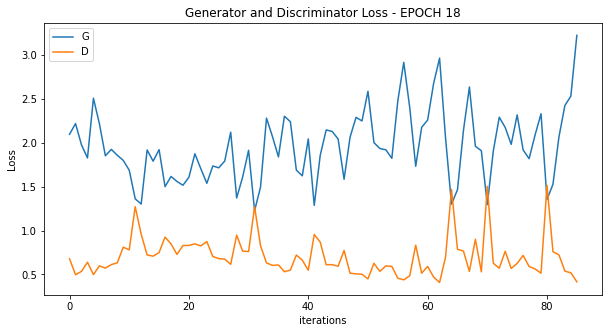

  0%|          | 0/86 [00:00<?, ?it/s]

[20/100][43/86] Loss_D: 0.6834 Loss_G: 2.3019 D(x): 0.8379 D(G(z)): 0.2655 / 0.1115
[20/100][86/86] Loss_D: 0.5511 Loss_G: 2.7166 D(x): 0.7548 D(G(z)): 0.1248 / 0.0925


  0%|          | 0/86 [00:00<?, ?it/s]

[21/100][43/86] Loss_D: 1.6457 Loss_G: 1.7703 D(x): 0.1945 D(G(z)): 0.0606 / 0.1578
[21/100][86/86] Loss_D: 0.4154 Loss_G: 3.3765 D(x): 0.7929 D(G(z)): 0.0411 / 0.0416


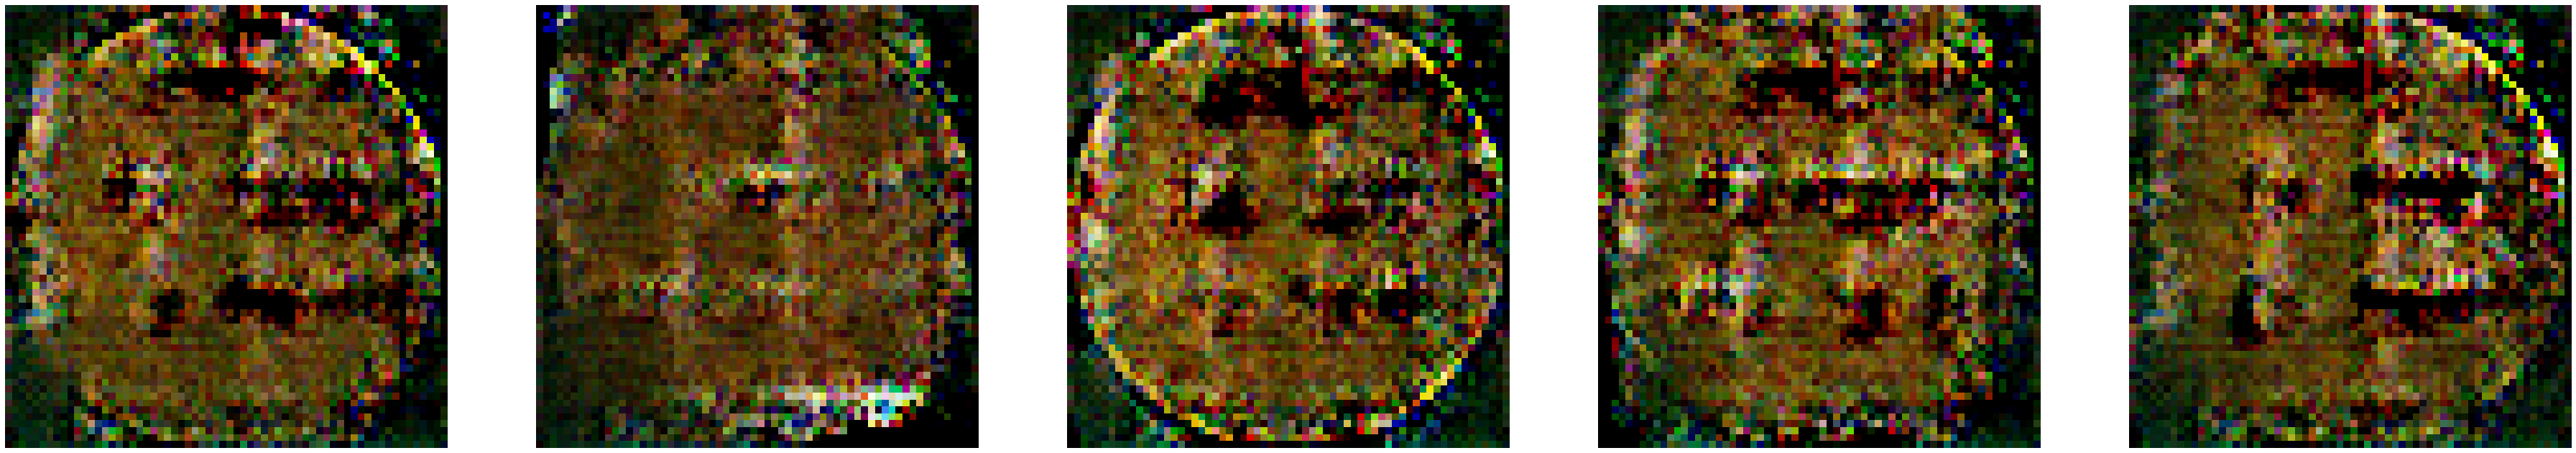

  0%|          | 0/86 [00:00<?, ?it/s]

[22/100][43/86] Loss_D: 0.6680 Loss_G: 1.7717 D(x): 0.7072 D(G(z)): 0.1919 / 0.1547
[22/100][86/86] Loss_D: 0.5939 Loss_G: 2.0315 D(x): 0.8220 D(G(z)): 0.2098 / 0.1377


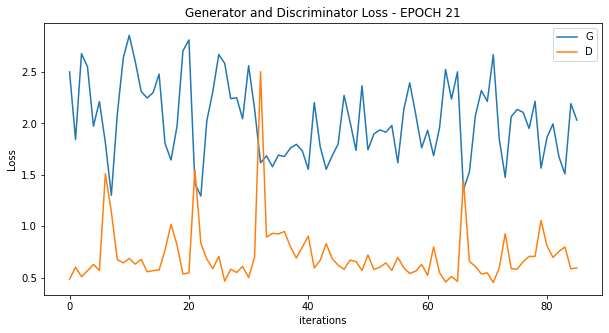

  0%|          | 0/86 [00:00<?, ?it/s]

[23/100][43/86] Loss_D: 3.1924 Loss_G: 1.0862 D(x): 0.0502 D(G(z)): 0.1724 / 0.3307
[23/100][86/86] Loss_D: 0.5331 Loss_G: 2.1911 D(x): 0.8124 D(G(z)): 0.1576 / 0.1147


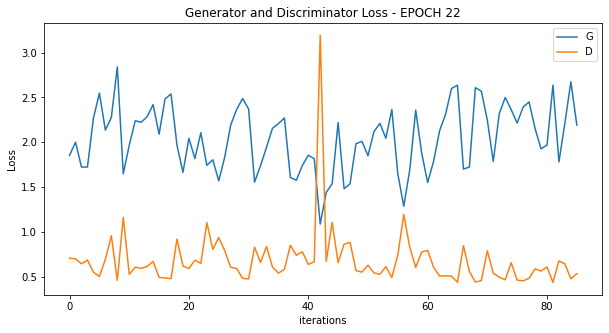

  0%|          | 0/86 [00:00<?, ?it/s]

[24/100][43/86] Loss_D: 0.5557 Loss_G: 2.3668 D(x): 0.8415 D(G(z)): 0.1466 / 0.0996
[24/100][86/86] Loss_D: 0.5601 Loss_G: 2.5412 D(x): 0.8436 D(G(z)): 0.1358 / 0.0694


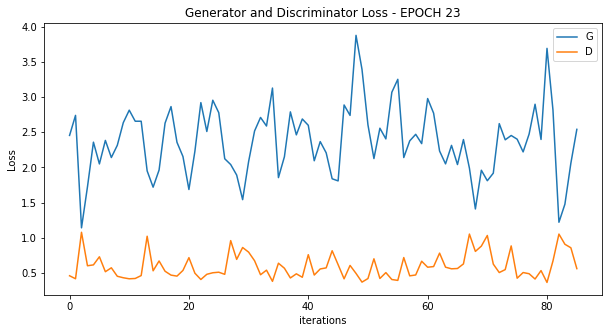

  0%|          | 0/86 [00:00<?, ?it/s]

[25/100][43/86] Loss_D: 0.3975 Loss_G: 3.4474 D(x): 0.7958 D(G(z)): 0.0258 / 0.0250
[25/100][86/86] Loss_D: 1.0769 Loss_G: 1.7993 D(x): 0.4901 D(G(z)): 0.1764 / 0.1899


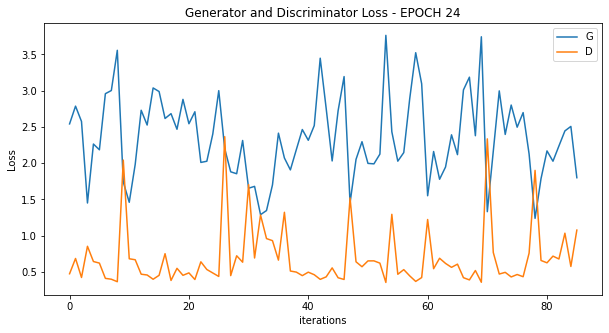

  0%|          | 0/86 [00:00<?, ?it/s]

[26/100][43/86] Loss_D: 0.6568 Loss_G: 1.9110 D(x): 0.6775 D(G(z)): 0.1574 / 0.1585
[26/100][86/86] Loss_D: 0.4364 Loss_G: 2.9649 D(x): 0.7925 D(G(z)): 0.0633 / 0.0558


  0%|          | 0/86 [00:00<?, ?it/s]

[27/100][43/86] Loss_D: 0.5758 Loss_G: 3.2111 D(x): 0.6198 D(G(z)): 0.0205 / 0.0321
[27/100][86/86] Loss_D: 0.5016 Loss_G: 2.7056 D(x): 0.8376 D(G(z)): 0.1018 / 0.0669


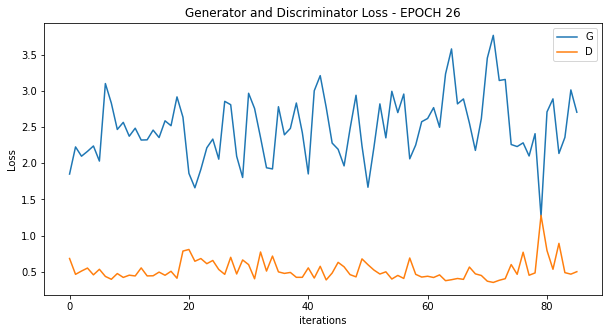

  0%|          | 0/86 [00:00<?, ?it/s]

[28/100][43/86] Loss_D: 0.5801 Loss_G: 2.4575 D(x): 0.9123 D(G(z)): 0.2131 / 0.1041
[28/100][86/86] Loss_D: 0.3853 Loss_G: 3.1994 D(x): 0.8508 D(G(z)): 0.0400 / 0.0344


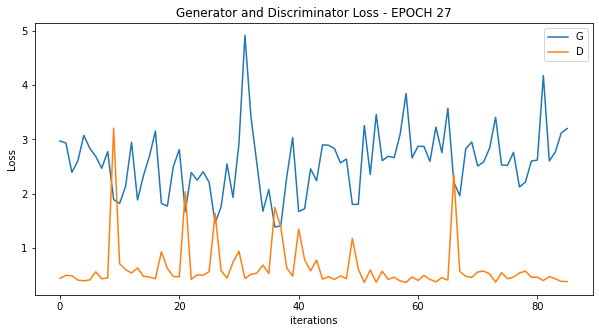

  0%|          | 0/86 [00:00<?, ?it/s]

[29/100][43/86] Loss_D: 0.3993 Loss_G: 2.6796 D(x): 0.8910 D(G(z)): 0.0675 / 0.0551
[29/100][86/86] Loss_D: 0.6419 Loss_G: 1.7703 D(x): 0.6964 D(G(z)): 0.1631 / 0.1561


  0%|          | 0/86 [00:00<?, ?it/s]

[30/100][43/86] Loss_D: 0.4655 Loss_G: 2.4031 D(x): 0.8508 D(G(z)): 0.1162 / 0.0784
[30/100][86/86] Loss_D: 0.6652 Loss_G: 1.9006 D(x): 0.7521 D(G(z)): 0.2296 / 0.1273


  0%|          | 0/86 [00:00<?, ?it/s]

[31/100][43/86] Loss_D: 0.8319 Loss_G: 1.5825 D(x): 0.7788 D(G(z)): 0.3381 / 0.2189
[31/100][86/86] Loss_D: 0.6128 Loss_G: 1.9564 D(x): 0.7698 D(G(z)): 0.1951 / 0.1281


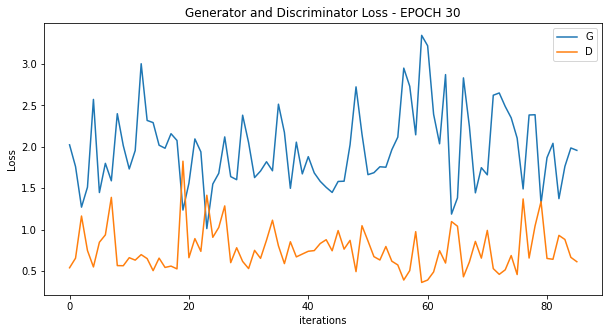

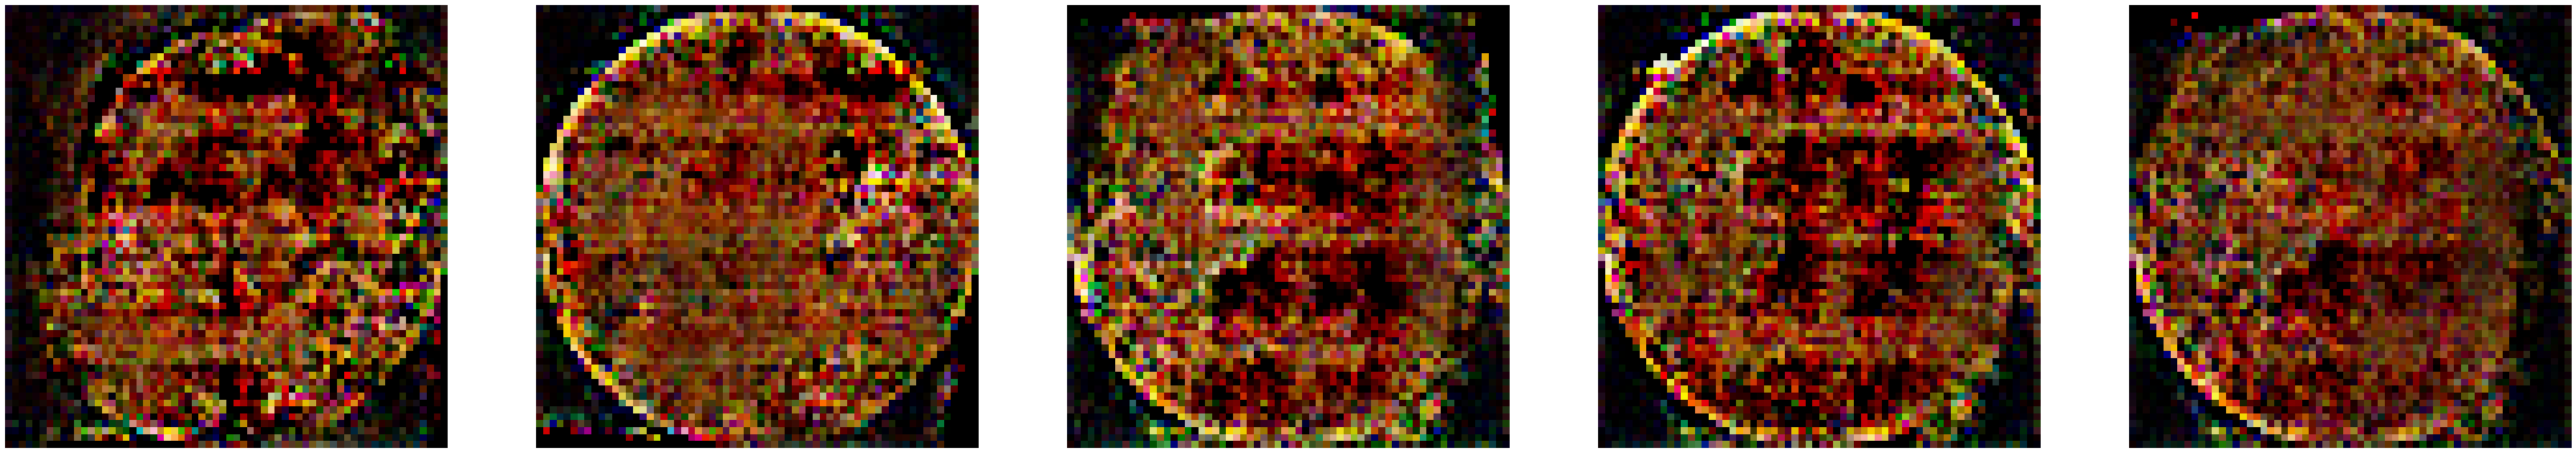

  0%|          | 0/86 [00:00<?, ?it/s]

[32/100][43/86] Loss_D: 0.9911 Loss_G: 1.6473 D(x): 0.4053 D(G(z)): 0.1007 / 0.1839
[32/100][86/86] Loss_D: 1.0432 Loss_G: 1.5202 D(x): 0.4693 D(G(z)): 0.2318 / 0.1963


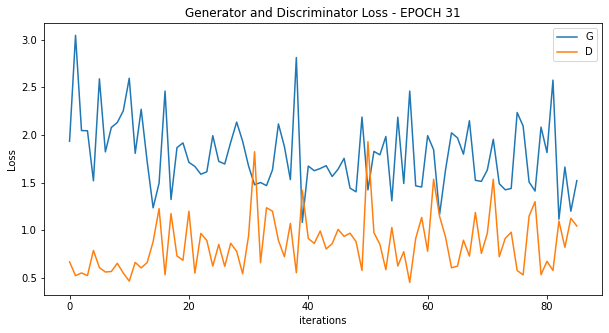

  0%|          | 0/86 [00:00<?, ?it/s]

[33/100][43/86] Loss_D: 1.0548 Loss_G: 1.2525 D(x): 0.5150 D(G(z)): 0.2822 / 0.2697
[33/100][86/86] Loss_D: 0.6000 Loss_G: 2.1234 D(x): 0.6836 D(G(z)): 0.1042 / 0.1126


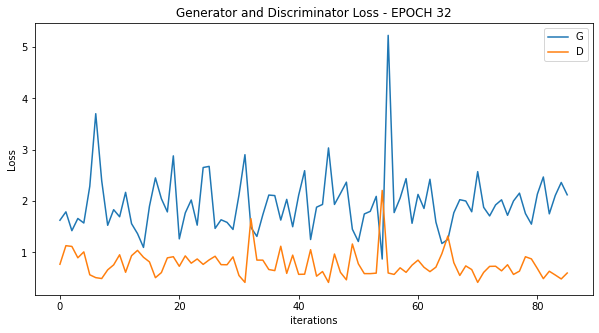

  0%|          | 0/86 [00:00<?, ?it/s]

[34/100][43/86] Loss_D: 0.5335 Loss_G: 2.3474 D(x): 0.6874 D(G(z)): 0.0631 / 0.1021
[34/100][86/86] Loss_D: 0.4820 Loss_G: 2.6039 D(x): 0.7534 D(G(z)): 0.0742 / 0.0690


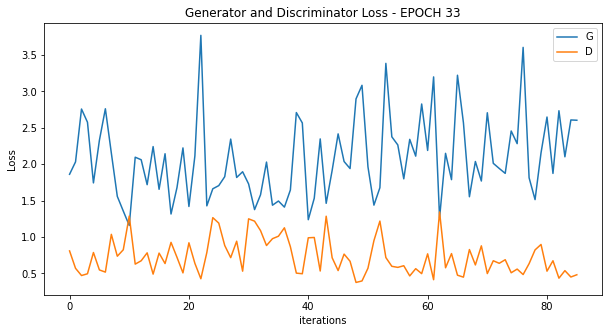

  0%|          | 0/86 [00:00<?, ?it/s]

[35/100][43/86] Loss_D: 1.1677 Loss_G: 1.0960 D(x): 0.5480 D(G(z)): 0.3388 / 0.3264
[35/100][86/86] Loss_D: 0.5292 Loss_G: 1.8964 D(x): 0.8981 D(G(z)): 0.1802 / 0.1411


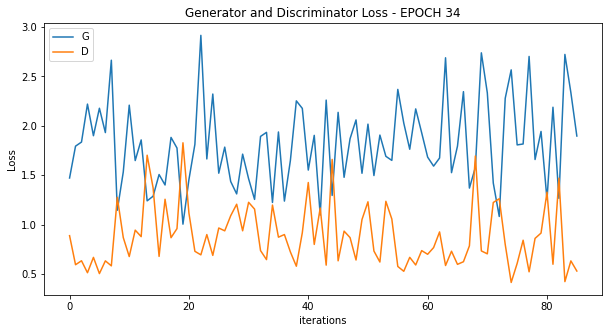

  0%|          | 0/86 [00:00<?, ?it/s]

[36/100][43/86] Loss_D: 0.8028 Loss_G: 1.4580 D(x): 0.8455 D(G(z)): 0.3400 / 0.2208
[36/100][86/86] Loss_D: 0.7689 Loss_G: 1.7592 D(x): 0.7007 D(G(z)): 0.2659 / 0.1698


  0%|          | 0/86 [00:00<?, ?it/s]

[37/100][43/86] Loss_D: 1.0563 Loss_G: 1.2427 D(x): 0.6973 D(G(z)): 0.4310 / 0.2789
[37/100][86/86] Loss_D: 0.8684 Loss_G: 1.4117 D(x): 0.5722 D(G(z)): 0.2204 / 0.2206


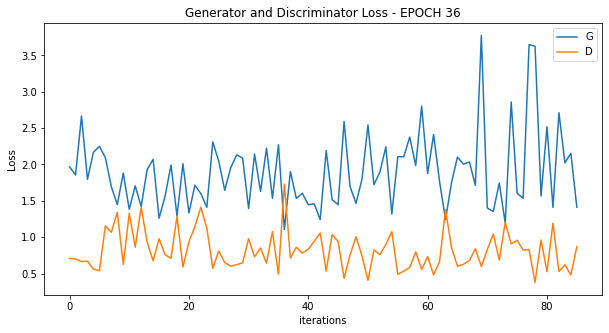

  0%|          | 0/86 [00:00<?, ?it/s]

[38/100][43/86] Loss_D: 0.6990 Loss_G: 2.1831 D(x): 0.5750 D(G(z)): 0.0859 / 0.1017
[38/100][86/86] Loss_D: 1.1742 Loss_G: 1.3158 D(x): 0.4766 D(G(z)): 0.3461 / 0.2574


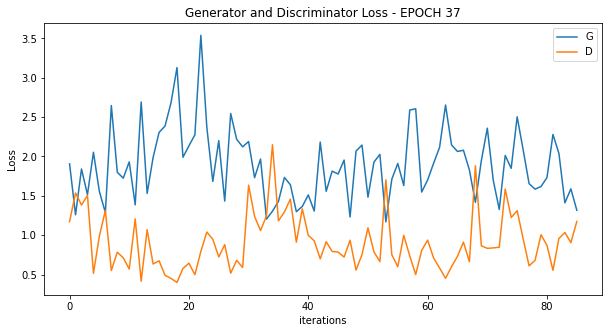

  0%|          | 0/86 [00:00<?, ?it/s]

[39/100][43/86] Loss_D: 0.7375 Loss_G: 1.9233 D(x): 0.6196 D(G(z)): 0.1390 / 0.1284
[39/100][86/86] Loss_D: 2.3984 Loss_G: 0.8603 D(x): 0.6616 D(G(z)): 0.8457 / 0.4465


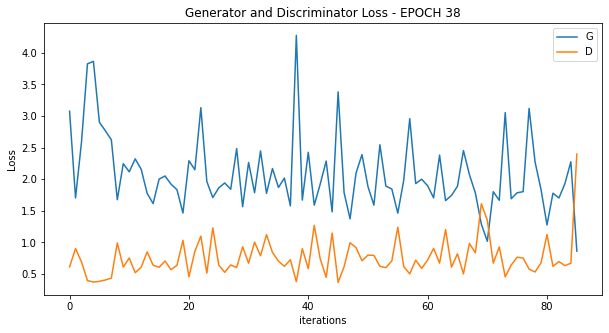

  0%|          | 0/86 [00:00<?, ?it/s]

[40/100][43/86] Loss_D: 0.5830 Loss_G: 2.1921 D(x): 0.6707 D(G(z)): 0.0909 / 0.1021
[40/100][86/86] Loss_D: 0.9043 Loss_G: 1.7005 D(x): 0.7864 D(G(z)): 0.3986 / 0.2174


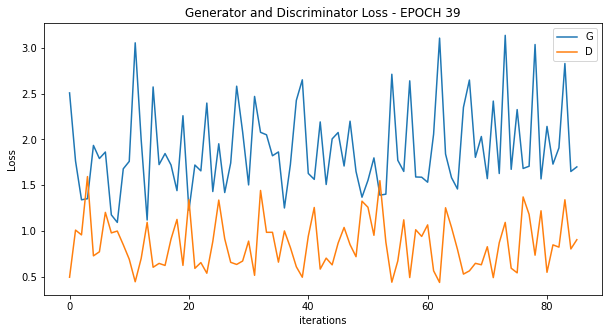

  0%|          | 0/86 [00:00<?, ?it/s]

[41/100][43/86] Loss_D: 0.9033 Loss_G: 2.2323 D(x): 0.4812 D(G(z)): 0.0839 / 0.0970
[41/100][86/86] Loss_D: 1.3919 Loss_G: 1.2704 D(x): 0.3208 D(G(z)): 0.1935 / 0.2721


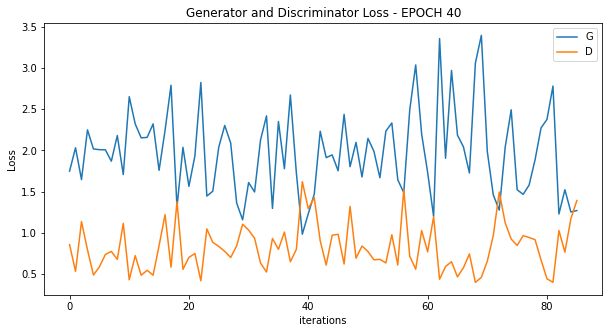

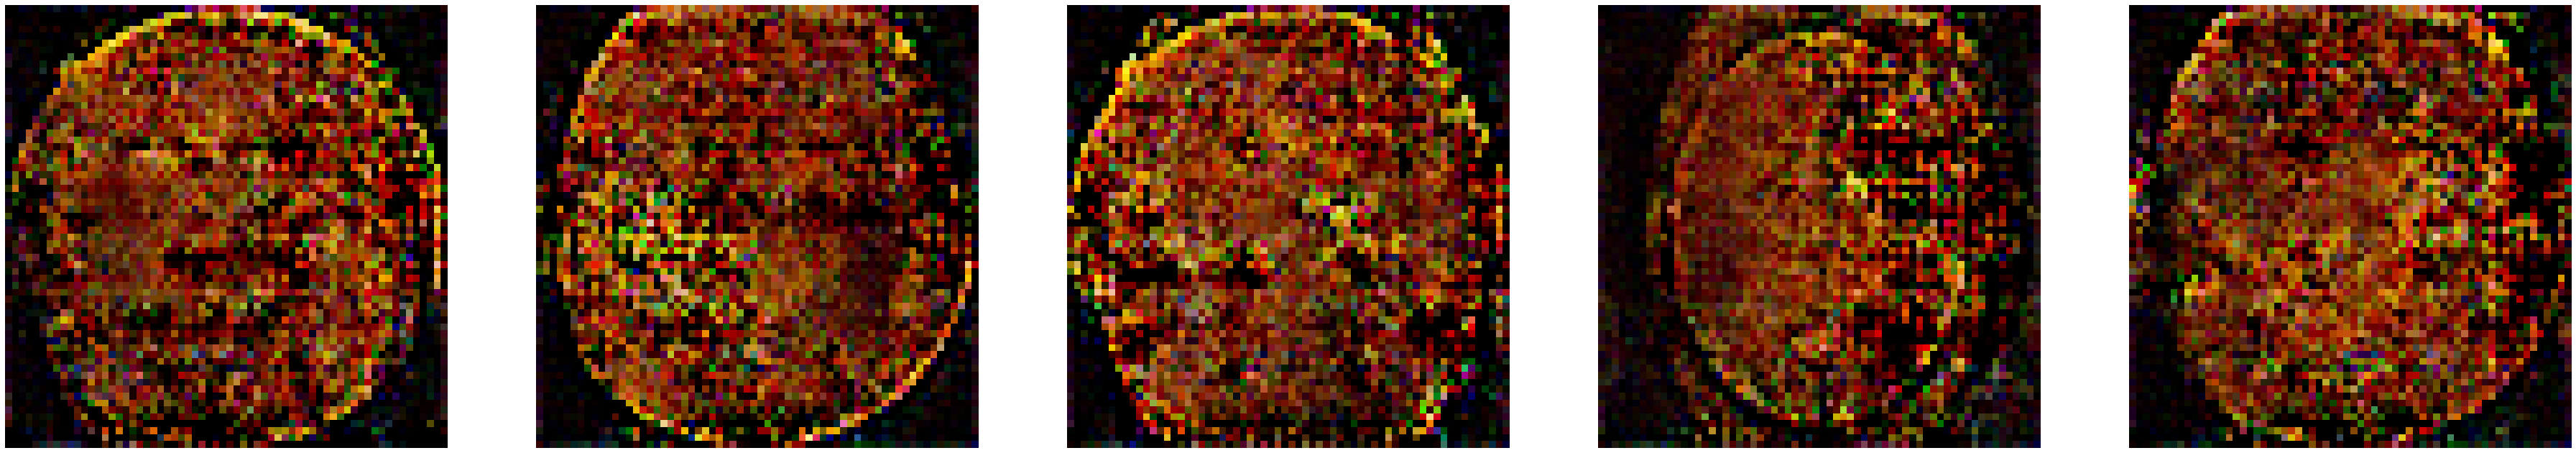

  0%|          | 0/86 [00:00<?, ?it/s]

[42/100][43/86] Loss_D: 0.9822 Loss_G: 1.5942 D(x): 0.6389 D(G(z)): 0.2620 / 0.1925
[42/100][86/86] Loss_D: 0.8943 Loss_G: 1.6549 D(x): 0.5976 D(G(z)): 0.2313 / 0.1799


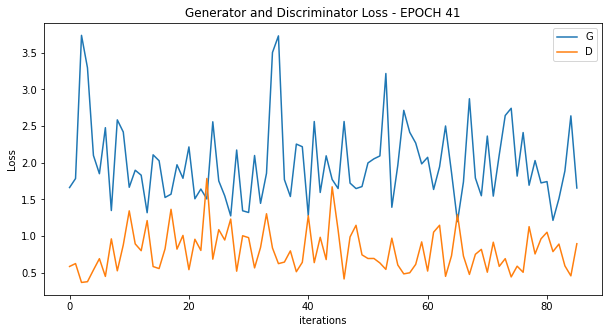

  0%|          | 0/86 [00:00<?, ?it/s]

[43/100][43/86] Loss_D: 0.7189 Loss_G: 1.8671 D(x): 0.7760 D(G(z)): 0.2592 / 0.1446
[43/100][86/86] Loss_D: 0.6698 Loss_G: 2.1478 D(x): 0.8987 D(G(z)): 0.2428 / 0.1023


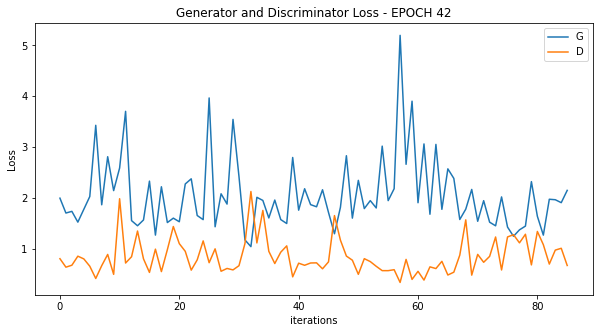

  0%|          | 0/86 [00:00<?, ?it/s]

[44/100][43/86] Loss_D: 0.7372 Loss_G: 2.1301 D(x): 0.7979 D(G(z)): 0.2806 / 0.0986
[44/100][86/86] Loss_D: 0.6497 Loss_G: 1.8600 D(x): 0.7227 D(G(z)): 0.1931 / 0.1391


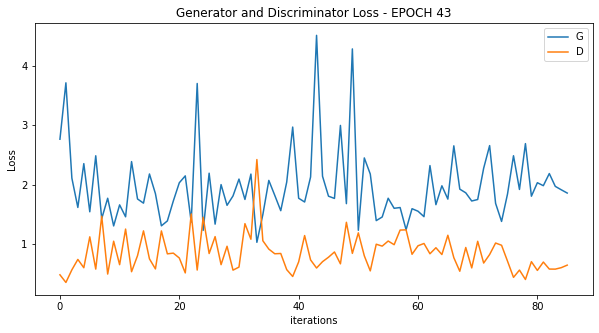

  0%|          | 0/86 [00:00<?, ?it/s]

[45/100][43/86] Loss_D: 0.9311 Loss_G: 2.2845 D(x): 0.4381 D(G(z)): 0.0779 / 0.0831
[45/100][86/86] Loss_D: 0.7792 Loss_G: 1.6926 D(x): 0.7321 D(G(z)): 0.2964 / 0.1611


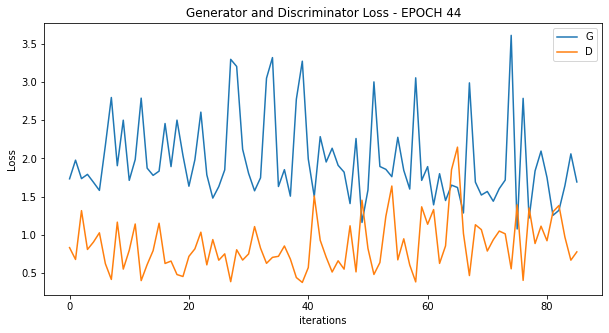

  0%|          | 0/86 [00:00<?, ?it/s]

[46/100][43/86] Loss_D: 1.1436 Loss_G: 1.8568 D(x): 0.6646 D(G(z)): 0.4665 / 0.1471
[46/100][86/86] Loss_D: 0.9875 Loss_G: 2.1007 D(x): 0.9089 D(G(z)): 0.4404 / 0.1152


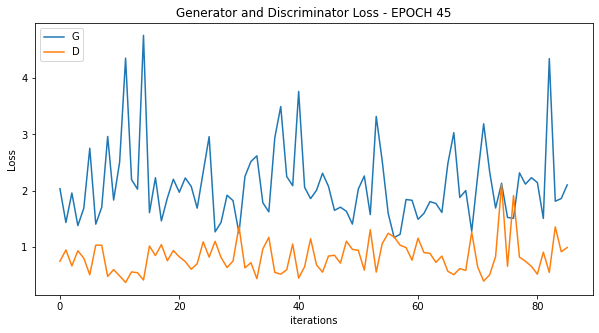

  0%|          | 0/86 [00:00<?, ?it/s]

[47/100][43/86] Loss_D: 0.5957 Loss_G: 1.9947 D(x): 0.8655 D(G(z)): 0.2258 / 0.1278
[47/100][86/86] Loss_D: 1.0625 Loss_G: 1.4381 D(x): 0.6447 D(G(z)): 0.4167 / 0.2284


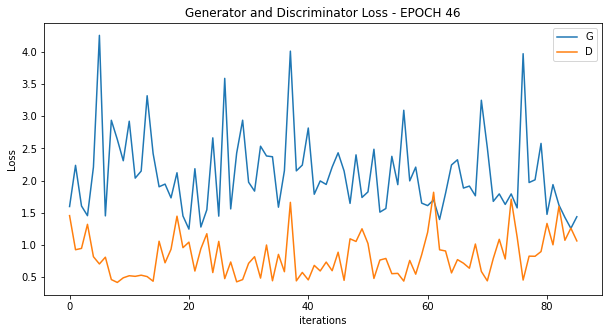

  0%|          | 0/86 [00:00<?, ?it/s]

[48/100][43/86] Loss_D: 0.4414 Loss_G: 2.8460 D(x): 0.7850 D(G(z)): 0.0568 / 0.0564
[48/100][86/86] Loss_D: 0.8409 Loss_G: 1.2561 D(x): 0.7117 D(G(z)): 0.3148 / 0.2684


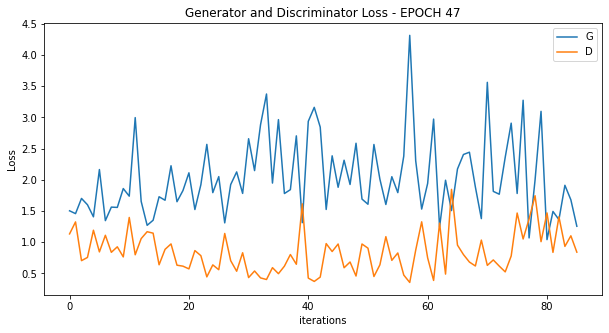

  0%|          | 0/86 [00:00<?, ?it/s]

[49/100][43/86] Loss_D: 1.0537 Loss_G: 1.6458 D(x): 0.9027 D(G(z)): 0.5002 / 0.2159
[49/100][86/86] Loss_D: 0.4935 Loss_G: 2.7745 D(x): 0.7040 D(G(z)): 0.0411 / 0.0535


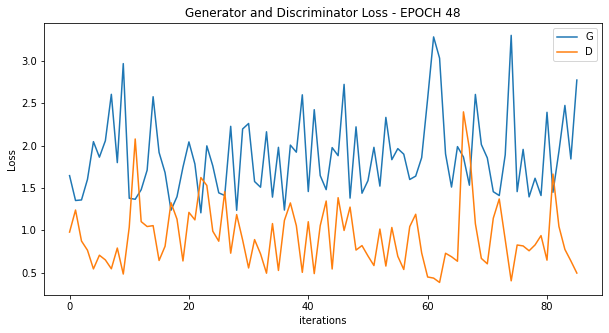

  0%|          | 0/86 [00:00<?, ?it/s]

[50/100][43/86] Loss_D: 0.3610 Loss_G: 3.2419 D(x): 0.8971 D(G(z)): 0.0285 / 0.0301
[50/100][86/86] Loss_D: 0.8019 Loss_G: 2.3248 D(x): 0.5907 D(G(z)): 0.1512 / 0.1013


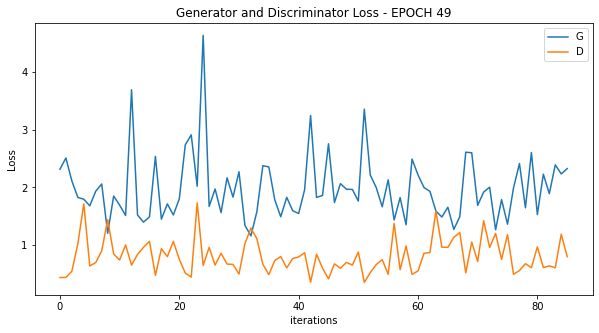

  0%|          | 0/86 [00:00<?, ?it/s]

[51/100][43/86] Loss_D: 1.4501 Loss_G: 1.7066 D(x): 0.7023 D(G(z)): 0.6162 / 0.1998
[51/100][86/86] Loss_D: 0.5967 Loss_G: 2.1138 D(x): 0.6913 D(G(z)): 0.1100 / 0.1062


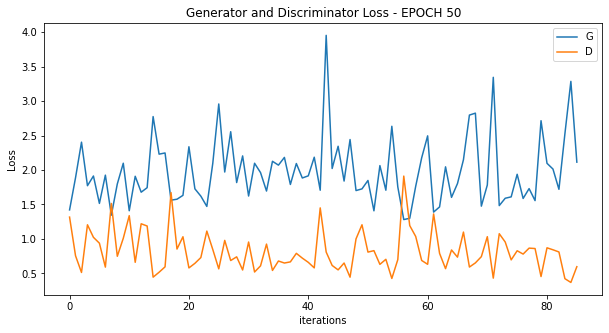

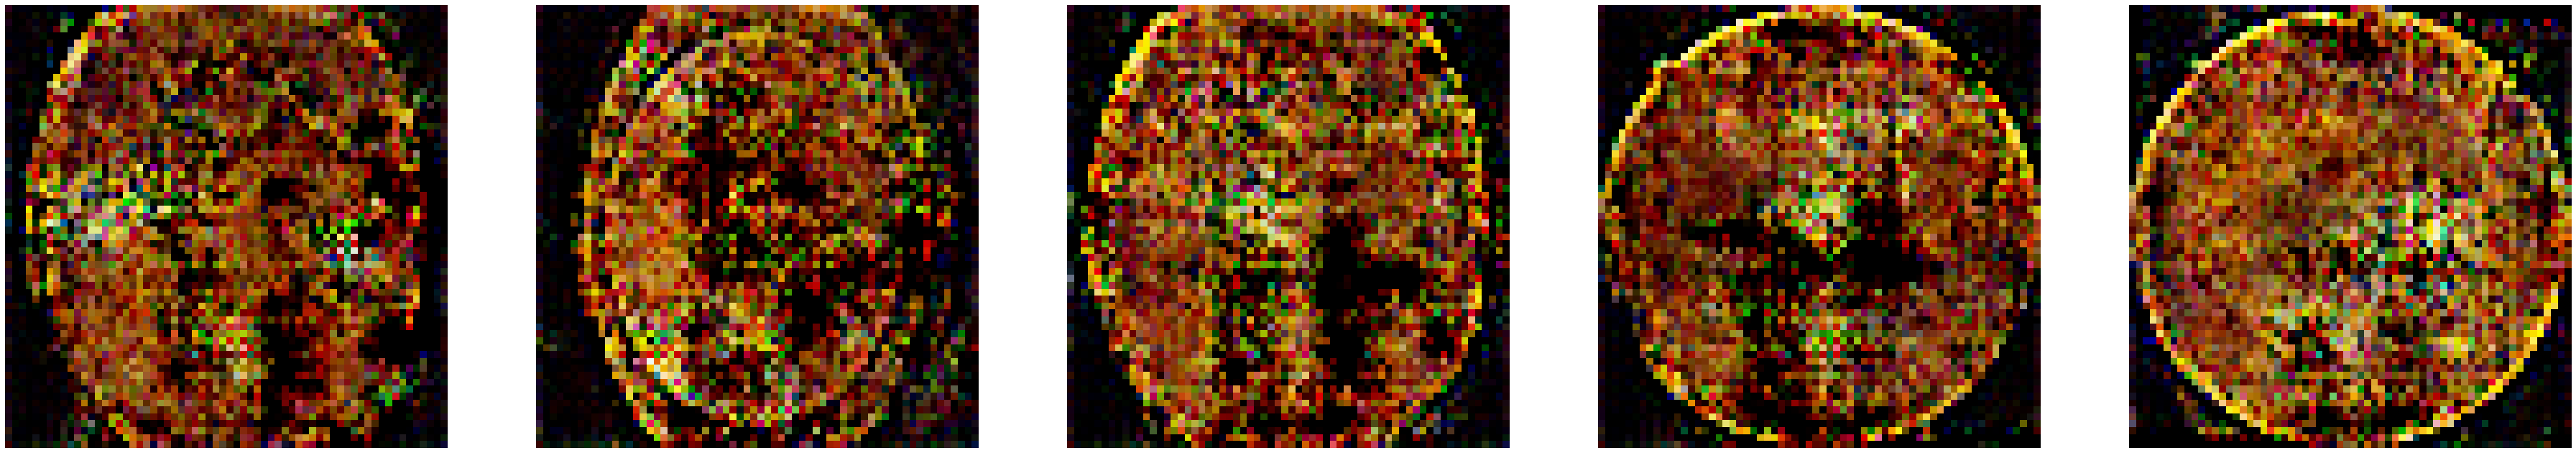

  0%|          | 0/86 [00:00<?, ?it/s]

[52/100][43/86] Loss_D: 0.8093 Loss_G: 2.1386 D(x): 0.5086 D(G(z)): 0.0916 / 0.1152
[52/100][86/86] Loss_D: 0.6890 Loss_G: 1.7731 D(x): 0.7108 D(G(z)): 0.1972 / 0.1577


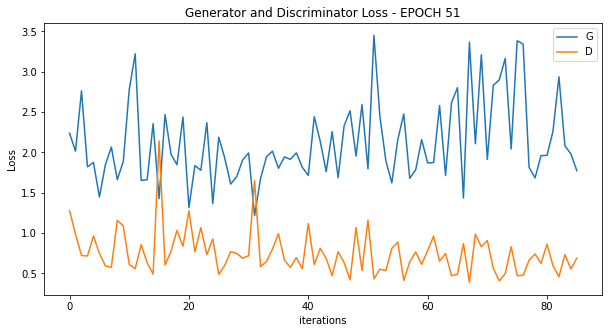

  0%|          | 0/86 [00:00<?, ?it/s]

[53/100][43/86] Loss_D: 0.9248 Loss_G: 1.8683 D(x): 0.5747 D(G(z)): 0.2463 / 0.1804
[53/100][86/86] Loss_D: 0.3797 Loss_G: 3.5034 D(x): 0.8586 D(G(z)): 0.0231 / 0.0228


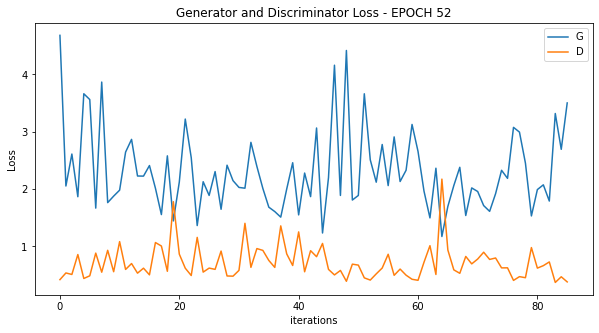

  0%|          | 0/86 [00:00<?, ?it/s]

[54/100][43/86] Loss_D: 1.1704 Loss_G: 1.8459 D(x): 0.6877 D(G(z)): 0.4877 / 0.1361
[54/100][86/86] Loss_D: 0.6690 Loss_G: 1.7176 D(x): 0.7635 D(G(z)): 0.2266 / 0.1796


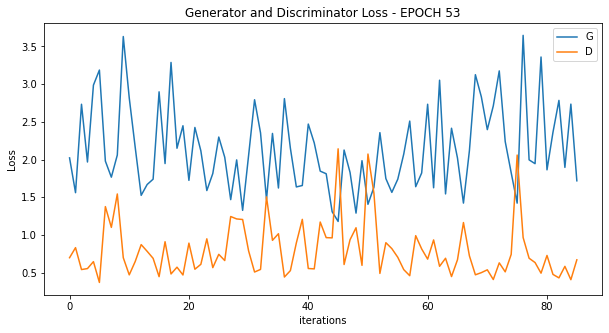

  0%|          | 0/86 [00:00<?, ?it/s]

[55/100][43/86] Loss_D: 0.7076 Loss_G: 2.1821 D(x): 0.5790 D(G(z)): 0.0829 / 0.1074
[55/100][86/86] Loss_D: 1.5310 Loss_G: 1.6778 D(x): 0.7515 D(G(z)): 0.6512 / 0.1706


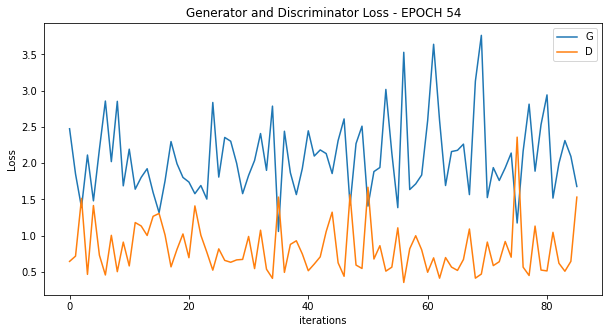

  0%|          | 0/86 [00:00<?, ?it/s]

[56/100][43/86] Loss_D: 1.4362 Loss_G: 1.6720 D(x): 0.6196 D(G(z)): 0.5345 / 0.2020
[56/100][86/86] Loss_D: 0.8847 Loss_G: 1.4527 D(x): 0.6353 D(G(z)): 0.2946 / 0.2328


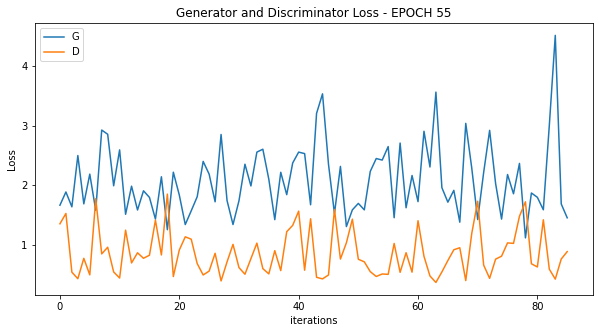

  0%|          | 0/86 [00:00<?, ?it/s]

[57/100][43/86] Loss_D: 0.6776 Loss_G: 3.1621 D(x): 0.5675 D(G(z)): 0.0240 / 0.0434
[57/100][86/86] Loss_D: 1.9130 Loss_G: 2.7740 D(x): 0.1488 D(G(z)): 0.0302 / 0.0592


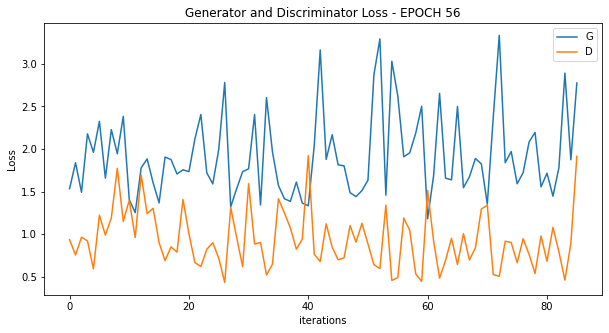

  0%|          | 0/86 [00:00<?, ?it/s]

[58/100][43/86] Loss_D: 1.1354 Loss_G: 2.2166 D(x): 0.8390 D(G(z)): 0.4956 / 0.1091
[58/100][86/86] Loss_D: 0.4512 Loss_G: 2.2780 D(x): 0.9291 D(G(z)): 0.1021 / 0.0963


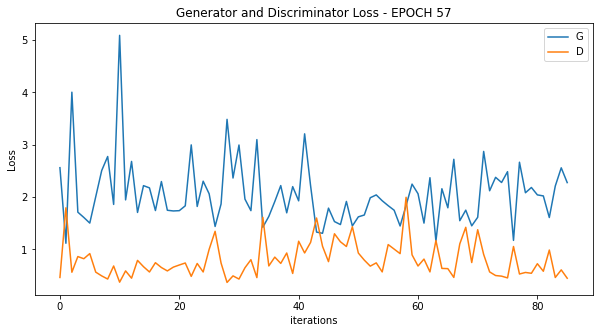

  0%|          | 0/86 [00:00<?, ?it/s]

[59/100][43/86] Loss_D: 0.5114 Loss_G: 2.1147 D(x): 0.8450 D(G(z)): 0.1486 / 0.1127
[59/100][86/86] Loss_D: 0.7262 Loss_G: 2.1219 D(x): 0.5844 D(G(z)): 0.0920 / 0.1074


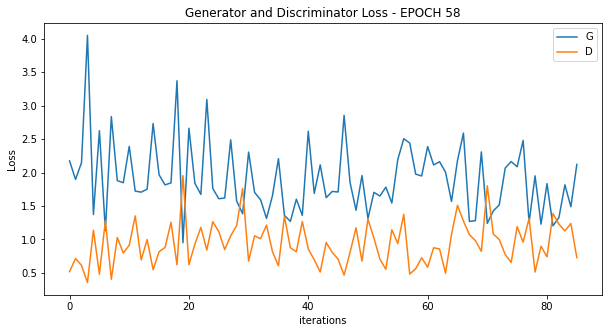

  0%|          | 0/86 [00:00<?, ?it/s]

[60/100][43/86] Loss_D: 0.5061 Loss_G: 2.0904 D(x): 0.8057 D(G(z)): 0.1207 / 0.1174
[60/100][86/86] Loss_D: 0.4384 Loss_G: 2.6889 D(x): 0.7829 D(G(z)): 0.0494 / 0.0575


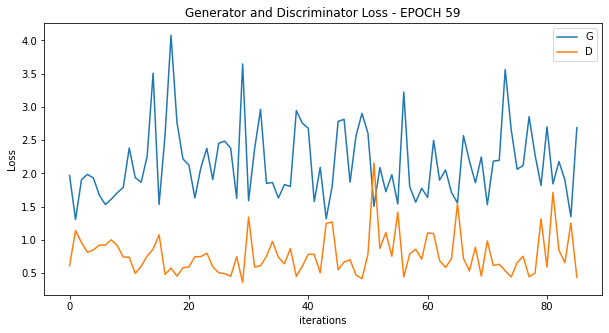

  0%|          | 0/86 [00:00<?, ?it/s]

[61/100][43/86] Loss_D: 0.5107 Loss_G: 3.1805 D(x): 0.6752 D(G(z)): 0.0256 / 0.0364
[61/100][86/86] Loss_D: 0.5087 Loss_G: 2.1870 D(x): 0.7665 D(G(z)): 0.0989 / 0.1019


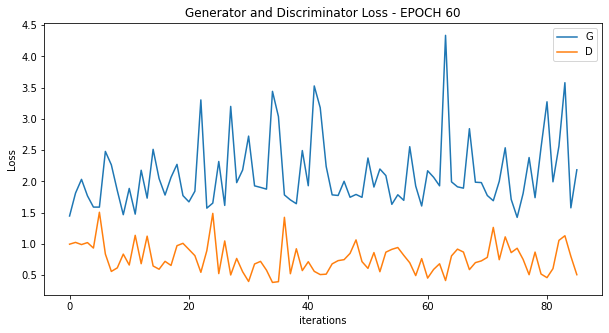

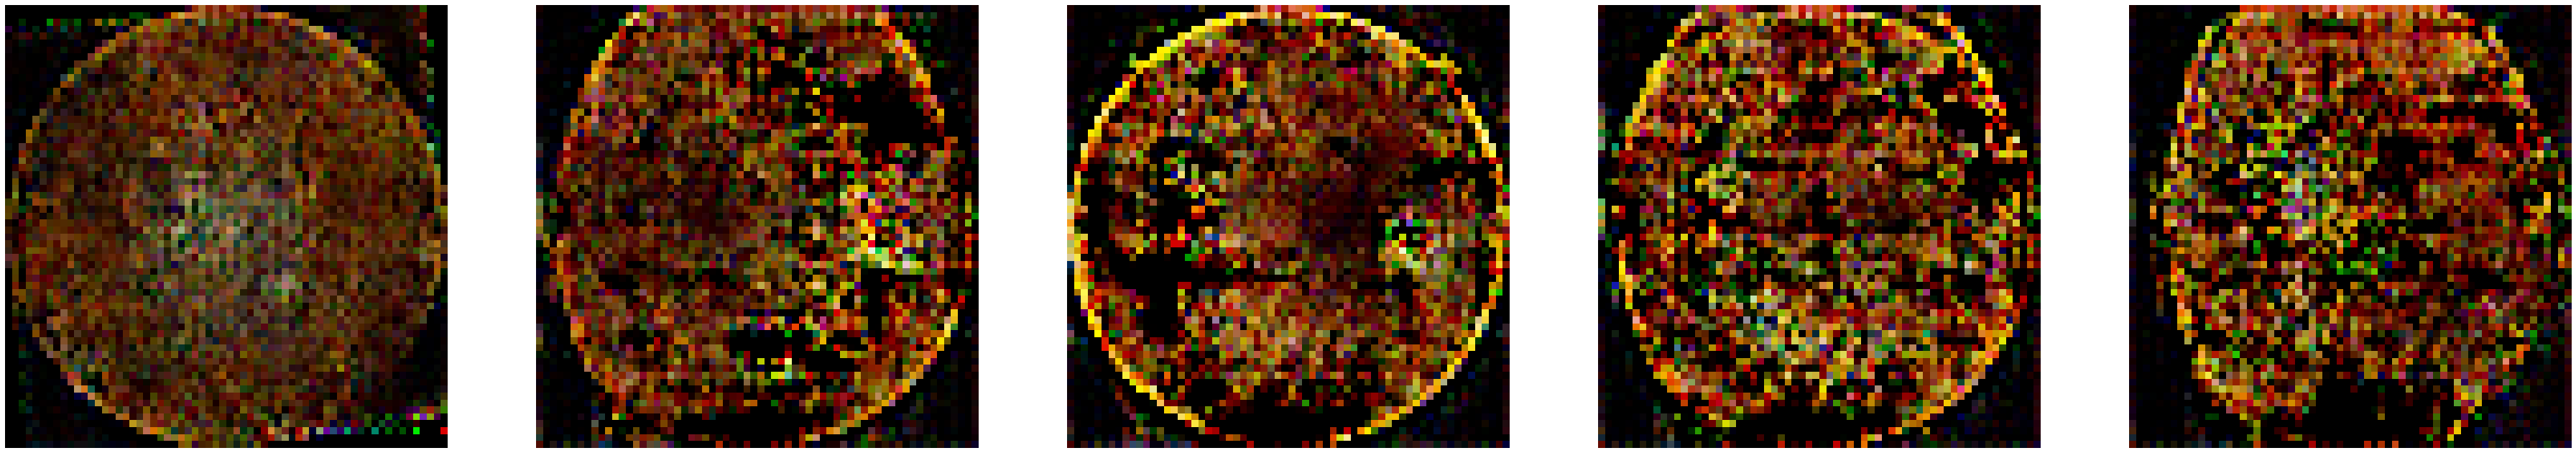

  0%|          | 0/86 [00:00<?, ?it/s]

[62/100][43/86] Loss_D: 0.9215 Loss_G: 2.3103 D(x): 0.5033 D(G(z)): 0.1568 / 0.0920
[62/100][86/86] Loss_D: 0.6138 Loss_G: 3.0042 D(x): 0.5852 D(G(z)): 0.0248 / 0.0425


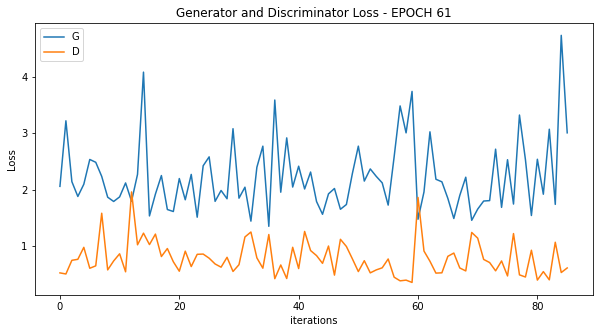

  0%|          | 0/86 [00:00<?, ?it/s]

[63/100][43/86] Loss_D: 0.5958 Loss_G: 3.9188 D(x): 0.5924 D(G(z)): 0.0108 / 0.0157
[63/100][86/86] Loss_D: 0.5744 Loss_G: 2.1274 D(x): 0.7010 D(G(z)): 0.1205 / 0.1131


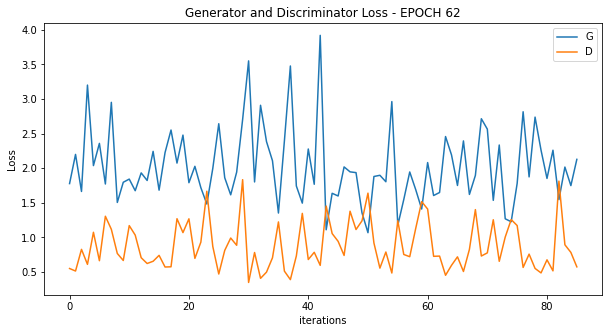

  0%|          | 0/86 [00:00<?, ?it/s]

[64/100][43/86] Loss_D: 0.5127 Loss_G: 2.1563 D(x): 0.9157 D(G(z)): 0.1594 / 0.1084
[64/100][86/86] Loss_D: 1.7058 Loss_G: 1.8050 D(x): 0.1854 D(G(z)): 0.1184 / 0.1566


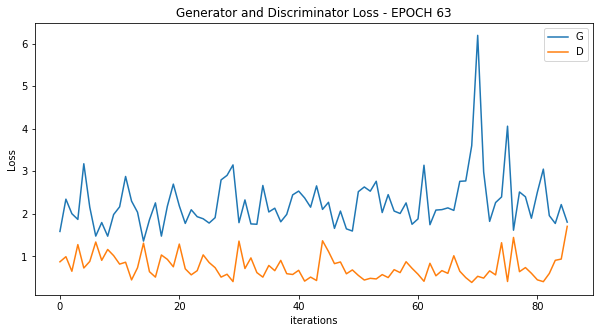

  0%|          | 0/86 [00:00<?, ?it/s]

[65/100][43/86] Loss_D: 1.5662 Loss_G: 1.3989 D(x): 0.3607 D(G(z)): 0.4142 / 0.2367
[65/100][86/86] Loss_D: 0.6529 Loss_G: 1.9451 D(x): 0.8284 D(G(z)): 0.2551 / 0.1444


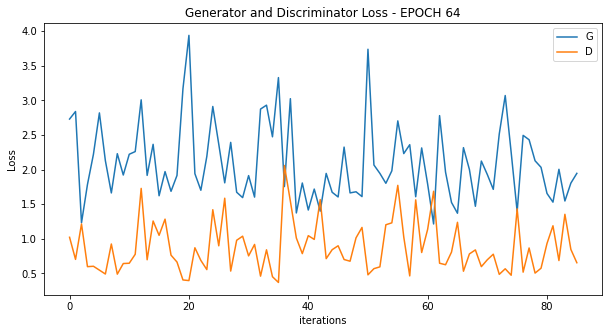

  0%|          | 0/86 [00:00<?, ?it/s]

[66/100][43/86] Loss_D: 0.6249 Loss_G: 2.1313 D(x): 0.8382 D(G(z)): 0.2364 / 0.1044
[66/100][86/86] Loss_D: 0.3760 Loss_G: 3.2485 D(x): 0.8595 D(G(z)): 0.0324 / 0.0314


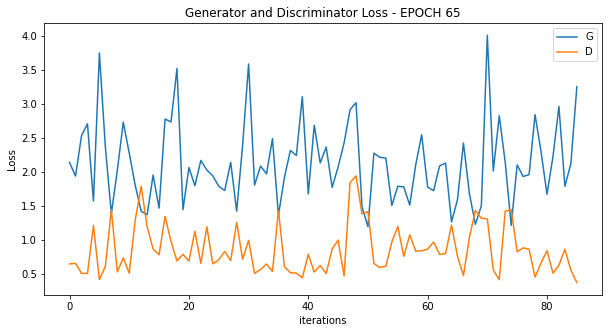

  0%|          | 0/86 [00:00<?, ?it/s]

[67/100][43/86] Loss_D: 1.1413 Loss_G: 1.9250 D(x): 0.3609 D(G(z)): 0.0792 / 0.1311
[67/100][86/86] Loss_D: 0.6099 Loss_G: 2.0539 D(x): 0.8018 D(G(z)): 0.2107 / 0.1178


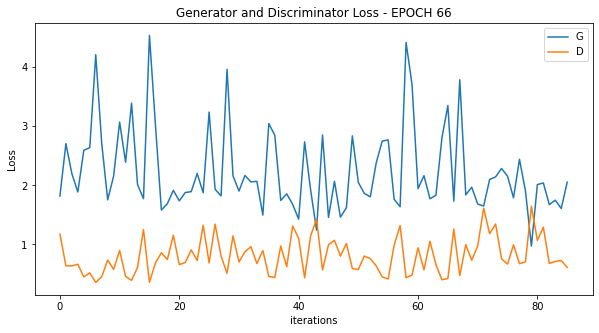

  0%|          | 0/86 [00:00<?, ?it/s]

[68/100][43/86] Loss_D: 0.5207 Loss_G: 3.4149 D(x): 0.6563 D(G(z)): 0.0208 / 0.0250
[68/100][86/86] Loss_D: 0.5385 Loss_G: 2.1699 D(x): 0.8022 D(G(z)): 0.1572 / 0.1034


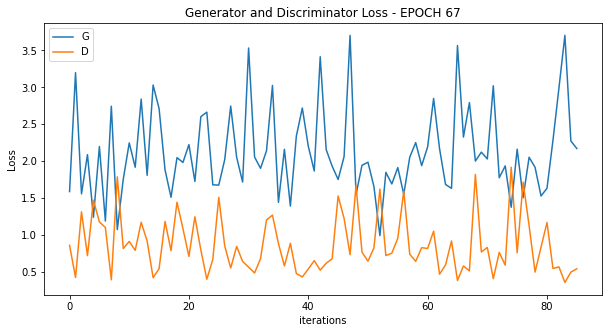

  0%|          | 0/86 [00:00<?, ?it/s]

[69/100][43/86] Loss_D: 0.9175 Loss_G: 1.7571 D(x): 0.9502 D(G(z)): 0.3941 / 0.1872
[69/100][86/86] Loss_D: 0.6082 Loss_G: 2.7738 D(x): 0.7391 D(G(z)): 0.1669 / 0.0676


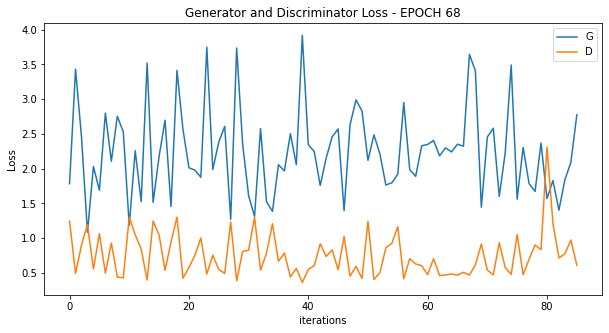

  0%|          | 0/86 [00:00<?, ?it/s]

[70/100][43/86] Loss_D: 0.5720 Loss_G: 1.8823 D(x): 0.8212 D(G(z)): 0.1616 / 0.1449
[70/100][86/86] Loss_D: 0.9598 Loss_G: 2.1413 D(x): 0.7339 D(G(z)): 0.4061 / 0.1031


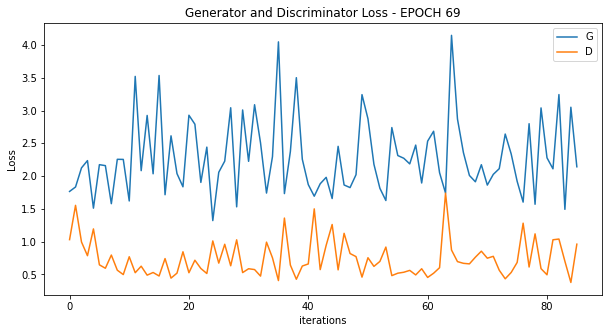

  0%|          | 0/86 [00:00<?, ?it/s]

[71/100][43/86] Loss_D: 1.8220 Loss_G: 1.2920 D(x): 0.7340 D(G(z)): 0.7338 / 0.2877
[71/100][86/86] Loss_D: 0.6960 Loss_G: 1.8214 D(x): 0.8495 D(G(z)): 0.2850 / 0.1687


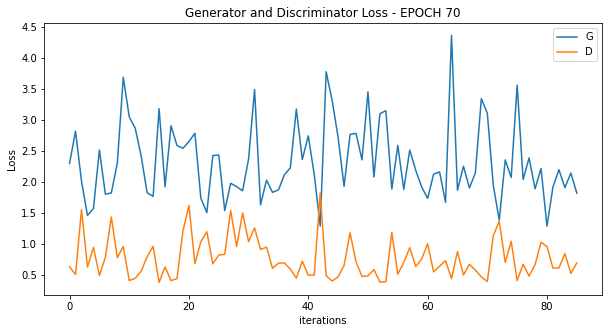

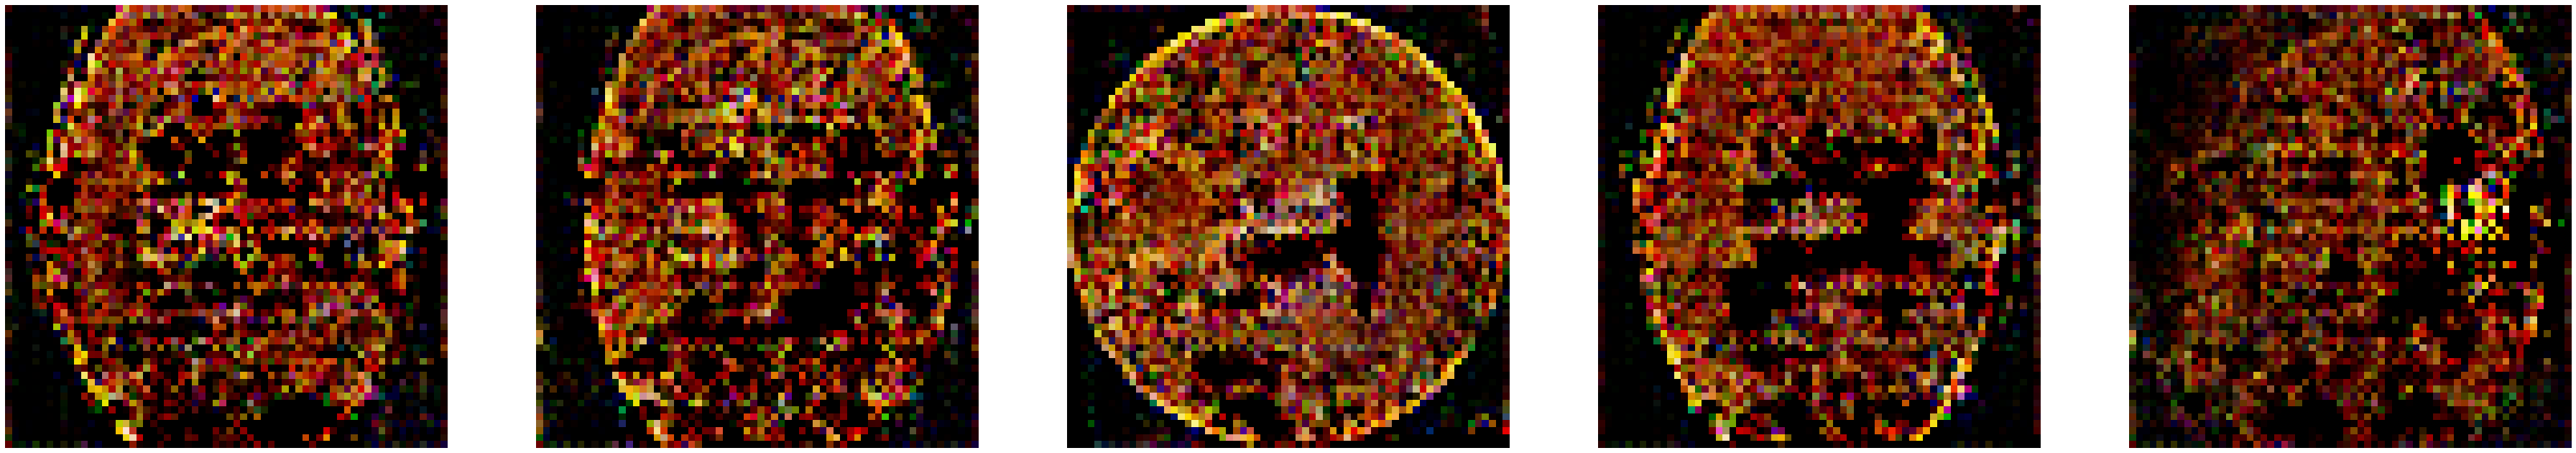

  0%|          | 0/86 [00:00<?, ?it/s]

[72/100][43/86] Loss_D: 0.4672 Loss_G: 2.3724 D(x): 0.7660 D(G(z)): 0.0646 / 0.0832
[72/100][86/86] Loss_D: 0.8104 Loss_G: 1.5129 D(x): 0.8051 D(G(z)): 0.3517 / 0.2167


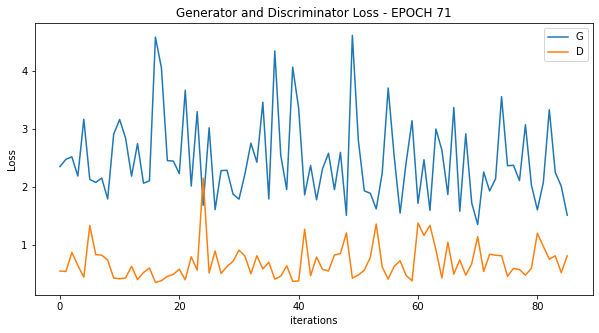

  0%|          | 0/86 [00:00<?, ?it/s]

[73/100][43/86] Loss_D: 0.6499 Loss_G: 1.9261 D(x): 0.6595 D(G(z)): 0.1308 / 0.1422
[73/100][86/86] Loss_D: 1.0193 Loss_G: 2.0852 D(x): 0.5049 D(G(z)): 0.1011 / 0.1167


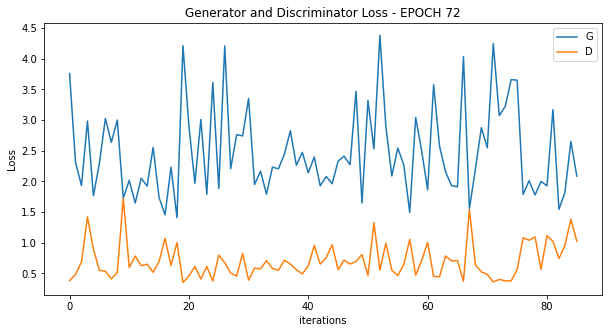

  0%|          | 0/86 [00:00<?, ?it/s]

[74/100][43/86] Loss_D: 0.4260 Loss_G: 4.1984 D(x): 0.7823 D(G(z)): 0.0094 / 0.0140
[74/100][86/86] Loss_D: 1.1544 Loss_G: 2.2007 D(x): 0.4526 D(G(z)): 0.2012 / 0.0952


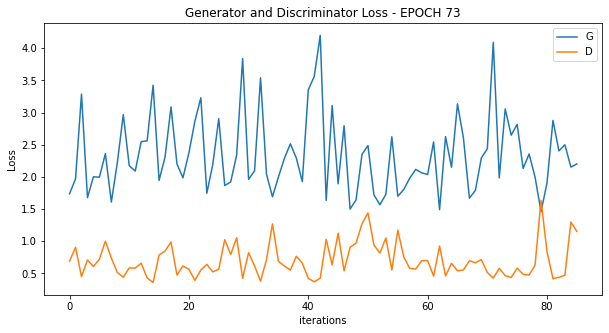

  0%|          | 0/86 [00:00<?, ?it/s]

[75/100][43/86] Loss_D: 0.5468 Loss_G: 2.2544 D(x): 0.7199 D(G(z)): 0.1059 / 0.1076
[75/100][86/86] Loss_D: 0.5416 Loss_G: 2.7366 D(x): 0.6750 D(G(z)): 0.0530 / 0.0571


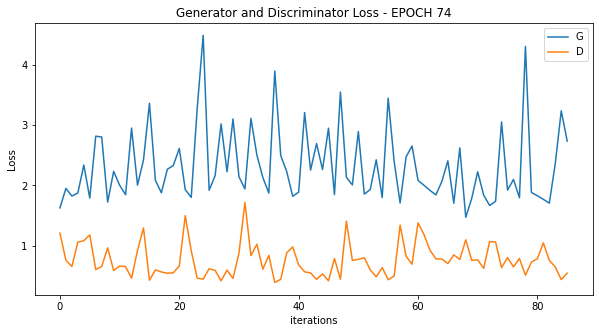

  0%|          | 0/86 [00:00<?, ?it/s]

[76/100][43/86] Loss_D: 0.5462 Loss_G: 2.1851 D(x): 0.7914 D(G(z)): 0.1438 / 0.1034
[76/100][86/86] Loss_D: 0.7054 Loss_G: 2.3294 D(x): 0.5967 D(G(z)): 0.0942 / 0.0854


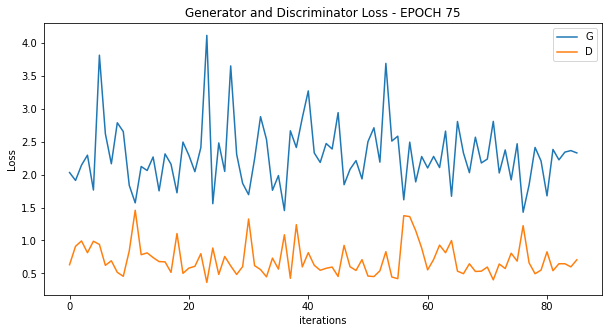

  0%|          | 0/86 [00:00<?, ?it/s]

[77/100][43/86] Loss_D: 0.5353 Loss_G: 3.7126 D(x): 0.6909 D(G(z)): 0.0316 / 0.0249
[77/100][86/86] Loss_D: 0.5858 Loss_G: 4.1417 D(x): 0.6178 D(G(z)): 0.0107 / 0.0115


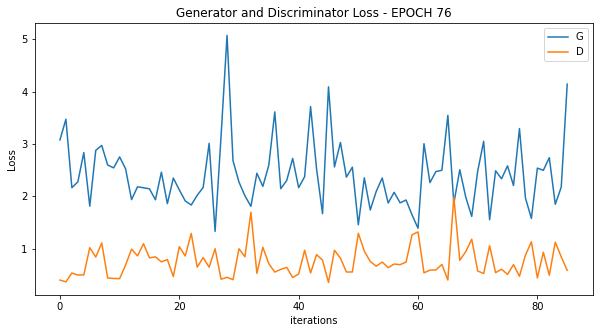

  0%|          | 0/86 [00:00<?, ?it/s]

[78/100][43/86] Loss_D: 0.5915 Loss_G: 4.1524 D(x): 0.5803 D(G(z)): 0.0061 / 0.0111
[78/100][86/86] Loss_D: 0.4706 Loss_G: 2.4536 D(x): 0.8396 D(G(z)): 0.0950 / 0.0877


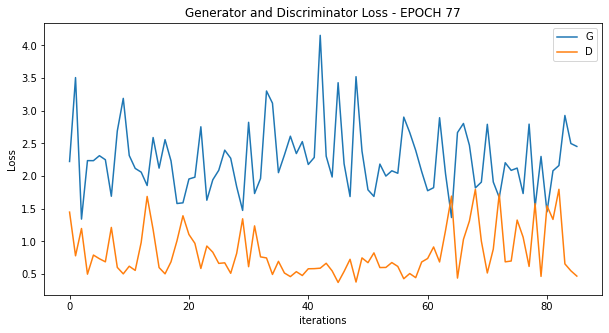

  0%|          | 0/86 [00:00<?, ?it/s]

[79/100][43/86] Loss_D: 1.0754 Loss_G: 1.8785 D(x): 0.6880 D(G(z)): 0.1873 / 0.1547
[79/100][86/86] Loss_D: 0.9541 Loss_G: 1.4722 D(x): 0.6176 D(G(z)): 0.3184 / 0.2198


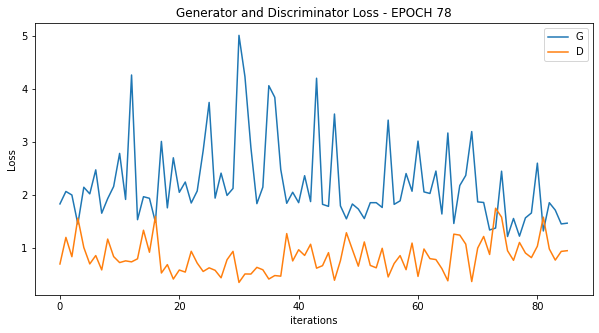

  0%|          | 0/86 [00:00<?, ?it/s]

[80/100][43/86] Loss_D: 0.5157 Loss_G: 2.6219 D(x): 0.7225 D(G(z)): 0.0742 / 0.0667
[80/100][86/86] Loss_D: 0.7751 Loss_G: 2.7110 D(x): 0.4995 D(G(z)): 0.0490 / 0.0565


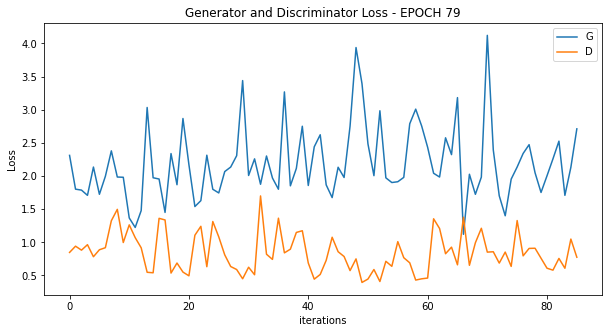

  0%|          | 0/86 [00:00<?, ?it/s]

[81/100][43/86] Loss_D: 1.0772 Loss_G: 1.4545 D(x): 0.7315 D(G(z)): 0.4477 / 0.2470
[81/100][86/86] Loss_D: 0.6080 Loss_G: 2.5072 D(x): 0.6956 D(G(z)): 0.0974 / 0.0794


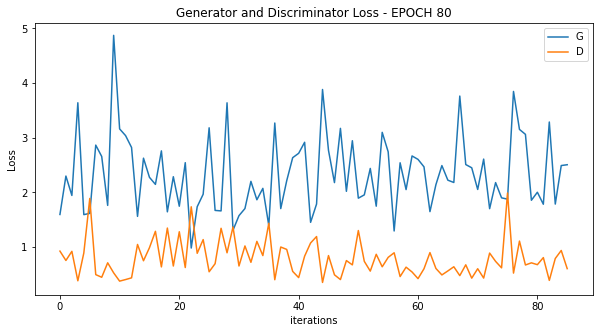

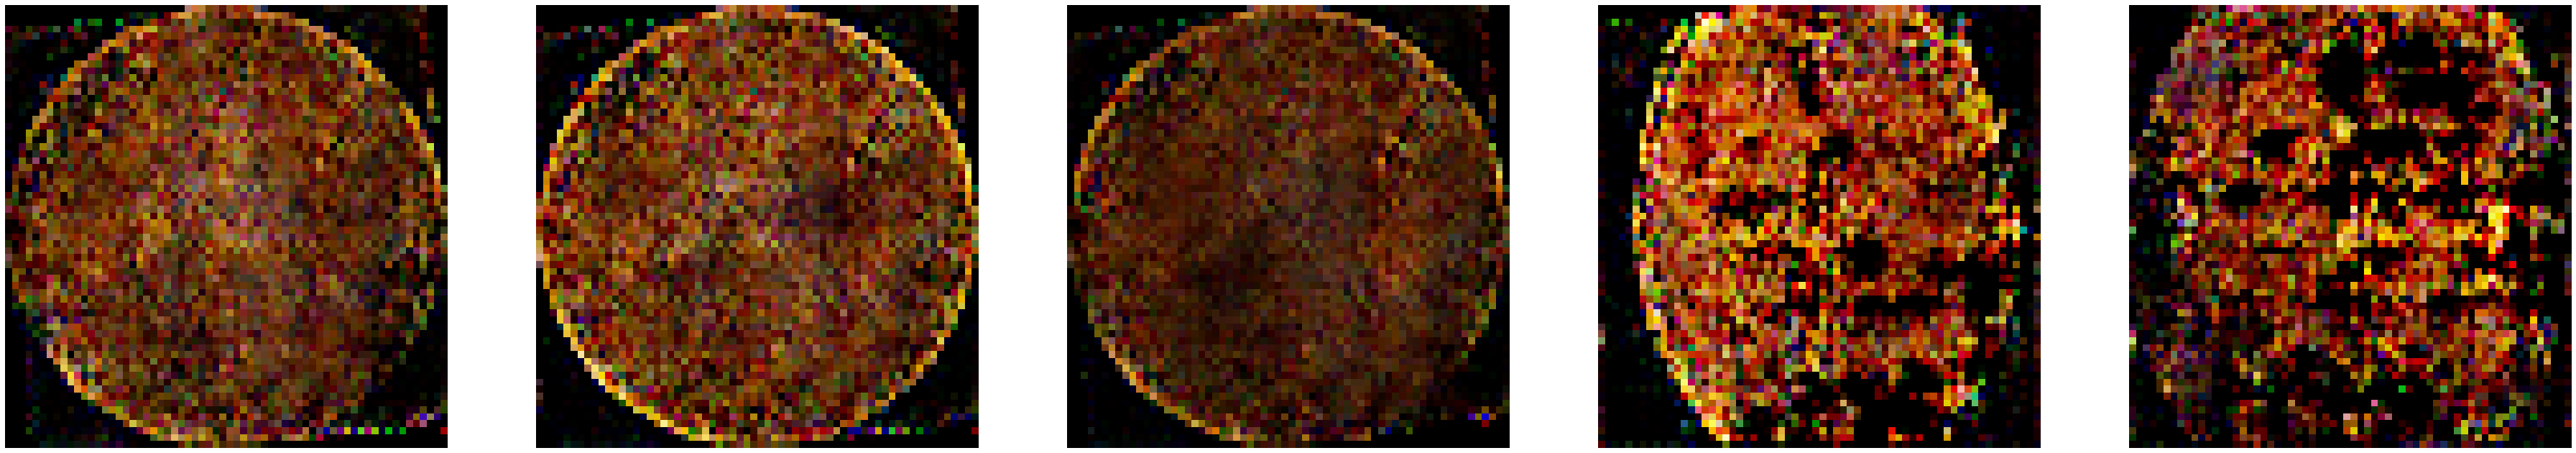

  0%|          | 0/86 [00:00<?, ?it/s]

[82/100][43/86] Loss_D: 1.3673 Loss_G: 2.1268 D(x): 0.8297 D(G(z)): 0.6152 / 0.1348
[82/100][86/86] Loss_D: 1.3237 Loss_G: 1.4362 D(x): 0.8961 D(G(z)): 0.5776 / 0.2238


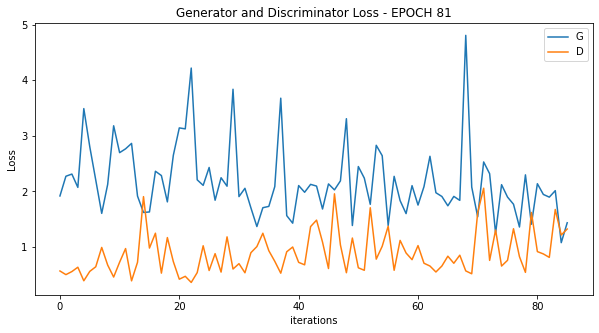

  0%|          | 0/86 [00:00<?, ?it/s]

[83/100][43/86] Loss_D: 0.5387 Loss_G: 2.1265 D(x): 0.8007 D(G(z)): 0.1476 / 0.1088
[83/100][86/86] Loss_D: 1.1812 Loss_G: 2.0669 D(x): 0.3167 D(G(z)): 0.0802 / 0.1347


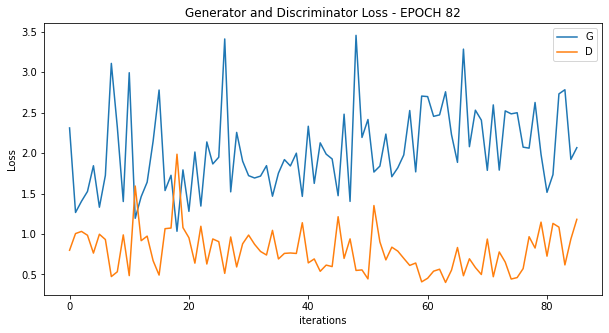

  0%|          | 0/86 [00:00<?, ?it/s]

[84/100][43/86] Loss_D: 0.5094 Loss_G: 2.4794 D(x): 0.8850 D(G(z)): 0.1419 / 0.0772
[84/100][86/86] Loss_D: 0.8858 Loss_G: 1.8181 D(x): 0.7285 D(G(z)): 0.3415 / 0.1674


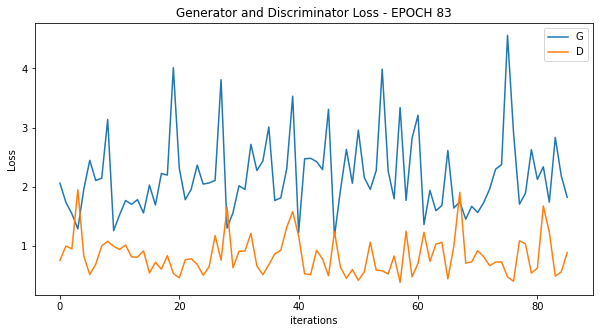

  0%|          | 0/86 [00:00<?, ?it/s]

[85/100][43/86] Loss_D: 0.5805 Loss_G: 2.3466 D(x): 0.6765 D(G(z)): 0.0942 / 0.0935
[85/100][86/86] Loss_D: 0.8684 Loss_G: 2.8415 D(x): 0.4769 D(G(z)): 0.0510 / 0.0507


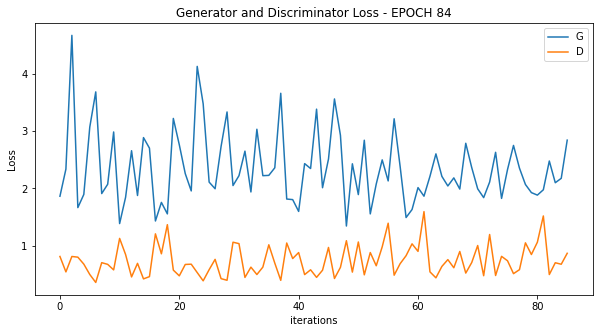

  0%|          | 0/86 [00:00<?, ?it/s]

[86/100][43/86] Loss_D: 1.1658 Loss_G: 1.9172 D(x): 0.8408 D(G(z)): 0.5343 / 0.1264
[86/100][86/86] Loss_D: 0.4869 Loss_G: 2.5206 D(x): 0.8501 D(G(z)): 0.1227 / 0.0732


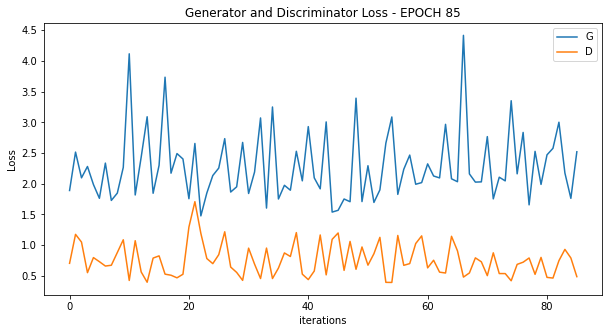

  0%|          | 0/86 [00:00<?, ?it/s]

[87/100][43/86] Loss_D: 1.7073 Loss_G: 2.1454 D(x): 0.8263 D(G(z)): 0.7209 / 0.1312
[87/100][86/86] Loss_D: 0.8039 Loss_G: 1.9456 D(x): 0.9659 D(G(z)): 0.3426 / 0.1471


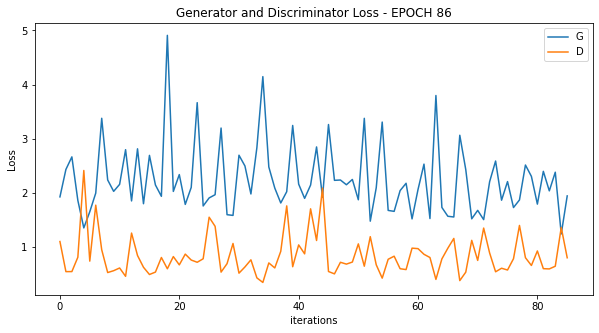

  0%|          | 0/86 [00:00<?, ?it/s]

[88/100][43/86] Loss_D: 0.6824 Loss_G: 2.0669 D(x): 0.7441 D(G(z)): 0.2220 / 0.1231
[88/100][86/86] Loss_D: 0.7291 Loss_G: 1.8541 D(x): 0.7299 D(G(z)): 0.2017 / 0.1558


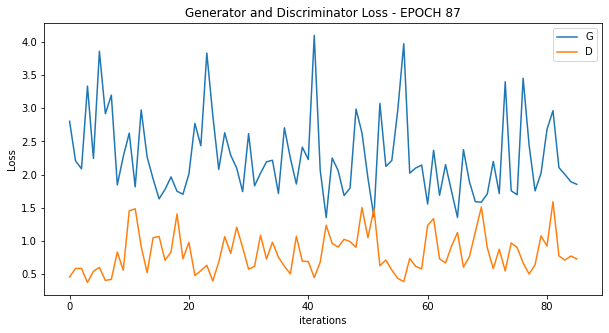

  0%|          | 0/86 [00:00<?, ?it/s]

[89/100][43/86] Loss_D: 1.2643 Loss_G: 1.6225 D(x): 0.5570 D(G(z)): 0.3096 / 0.2044
[89/100][86/86] Loss_D: 0.7081 Loss_G: 2.4238 D(x): 0.6890 D(G(z)): 0.1780 / 0.0925


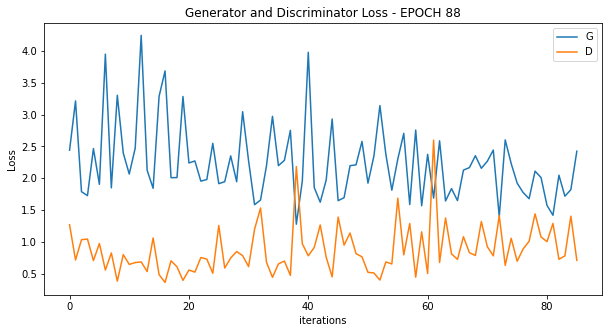

  0%|          | 0/86 [00:00<?, ?it/s]

[90/100][43/86] Loss_D: 0.5282 Loss_G: 2.1240 D(x): 0.7481 D(G(z)): 0.1082 / 0.1031
[90/100][86/86] Loss_D: 0.6919 Loss_G: 1.8315 D(x): 0.9033 D(G(z)): 0.2950 / 0.1514


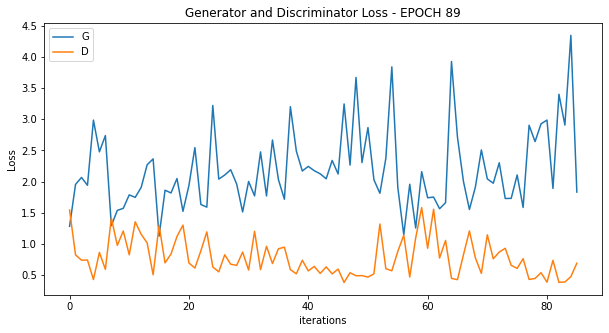

  0%|          | 0/86 [00:00<?, ?it/s]

[91/100][43/86] Loss_D: 0.3636 Loss_G: 3.3885 D(x): 0.8802 D(G(z)): 0.0249 / 0.0258
[91/100][86/86] Loss_D: 0.7248 Loss_G: 3.2134 D(x): 0.5231 D(G(z)): 0.0312 / 0.0386


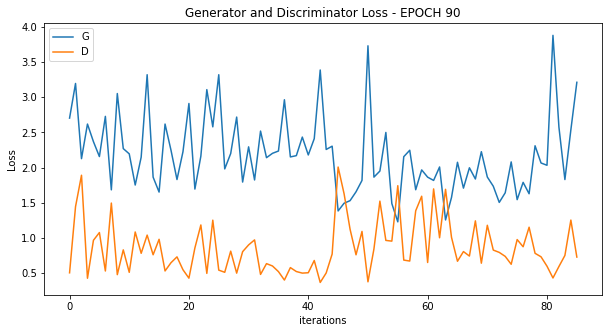

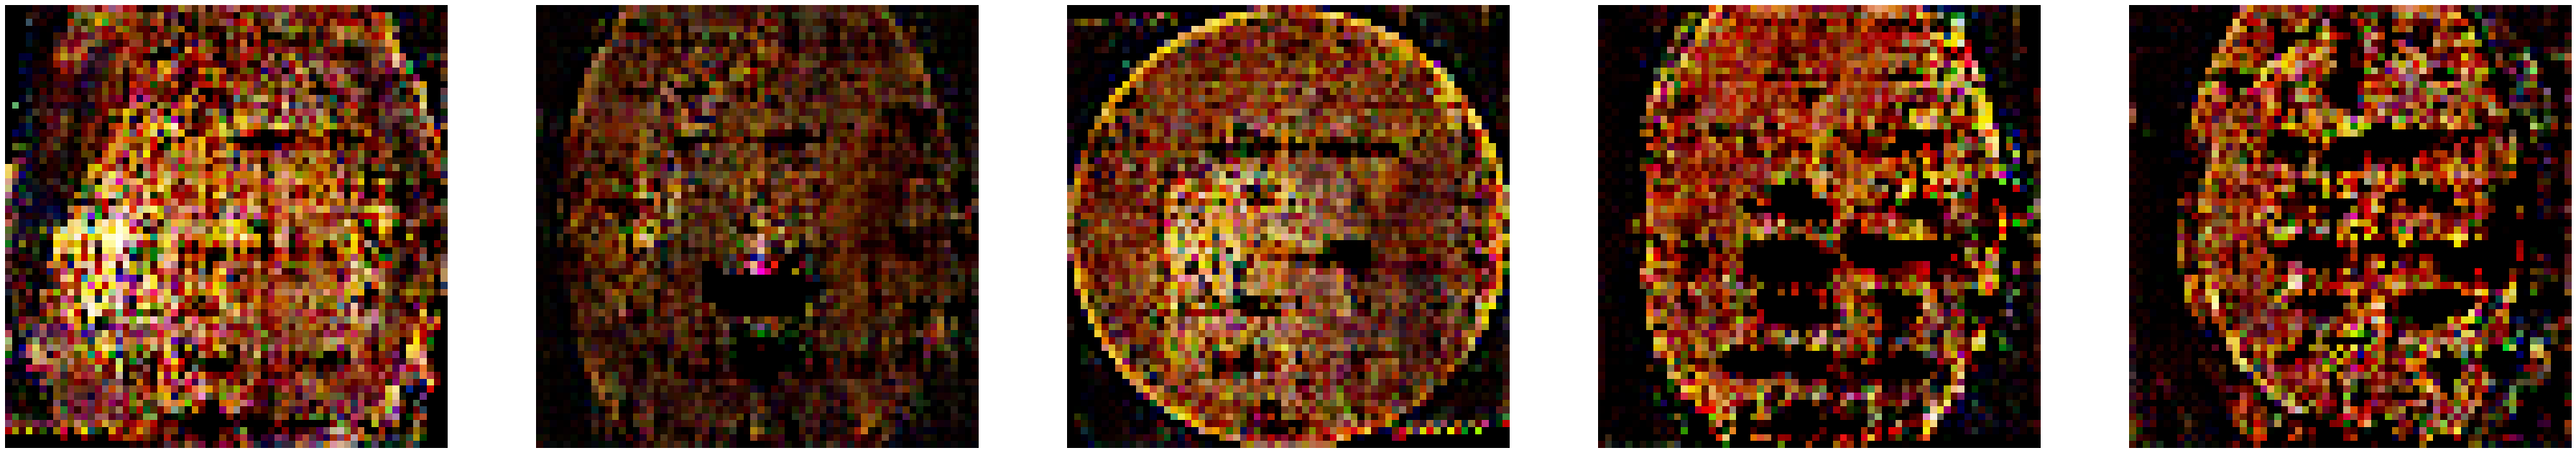

  0%|          | 0/86 [00:00<?, ?it/s]

[92/100][43/86] Loss_D: 0.6550 Loss_G: 1.7863 D(x): 0.6505 D(G(z)): 0.1210 / 0.1629
[92/100][86/86] Loss_D: 1.0487 Loss_G: 1.8473 D(x): 0.9075 D(G(z)): 0.4912 / 0.1423


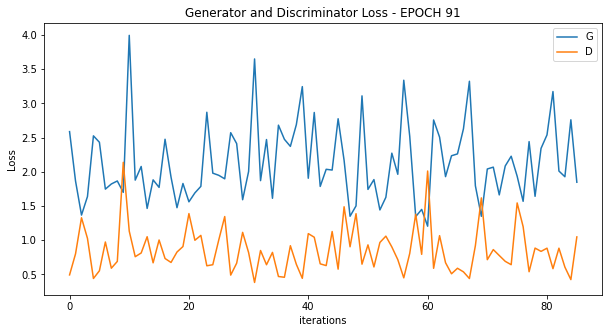

  0%|          | 0/86 [00:00<?, ?it/s]

[93/100][43/86] Loss_D: 0.3931 Loss_G: 3.1581 D(x): 0.9306 D(G(z)): 0.0469 / 0.0333
[93/100][86/86] Loss_D: 0.5493 Loss_G: 2.5567 D(x): 0.6954 D(G(z)): 0.0820 / 0.0645


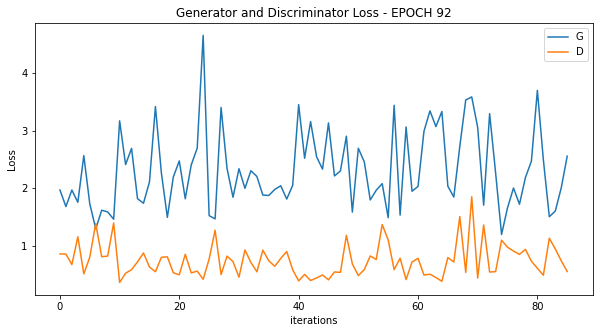

  0%|          | 0/86 [00:00<?, ?it/s]

[94/100][43/86] Loss_D: 0.7068 Loss_G: 2.3343 D(x): 0.8248 D(G(z)): 0.2855 / 0.1126
[94/100][86/86] Loss_D: 0.8317 Loss_G: 1.8354 D(x): 0.5695 D(G(z)): 0.1820 / 0.1507


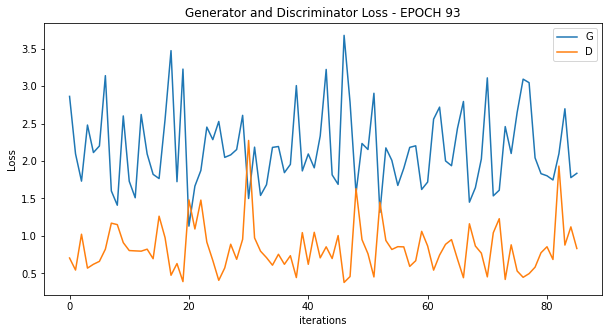

  0%|          | 0/86 [00:00<?, ?it/s]

[95/100][43/86] Loss_D: 0.5838 Loss_G: 2.2653 D(x): 0.7610 D(G(z)): 0.1560 / 0.0868
[95/100][86/86] Loss_D: 0.4480 Loss_G: 2.8031 D(x): 0.7941 D(G(z)): 0.0660 / 0.0524


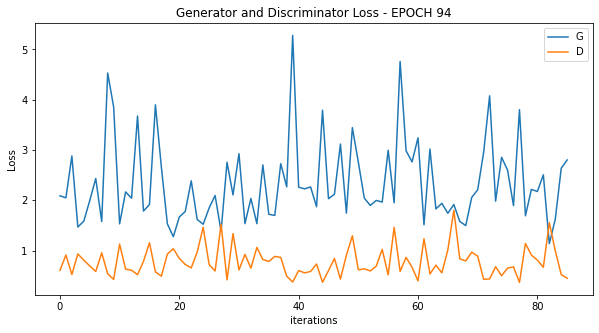

  0%|          | 0/86 [00:00<?, ?it/s]

[96/100][43/86] Loss_D: 1.2114 Loss_G: 1.4442 D(x): 0.7612 D(G(z)): 0.5259 / 0.2413
[96/100][86/86] Loss_D: 0.7466 Loss_G: 2.3045 D(x): 0.5458 D(G(z)): 0.0882 / 0.1031


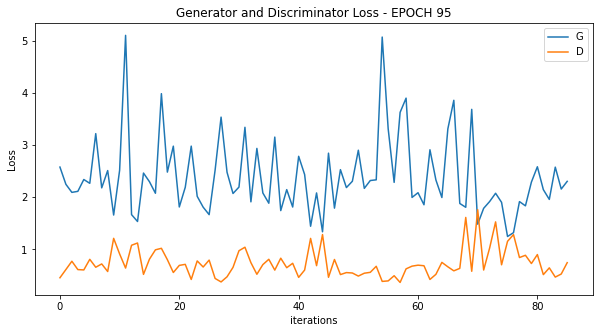

  0%|          | 0/86 [00:00<?, ?it/s]

[97/100][43/86] Loss_D: 1.0219 Loss_G: 1.7969 D(x): 0.5042 D(G(z)): 0.2330 / 0.1448
[97/100][86/86] Loss_D: 0.7194 Loss_G: 2.0153 D(x): 0.7295 D(G(z)): 0.2426 / 0.1298


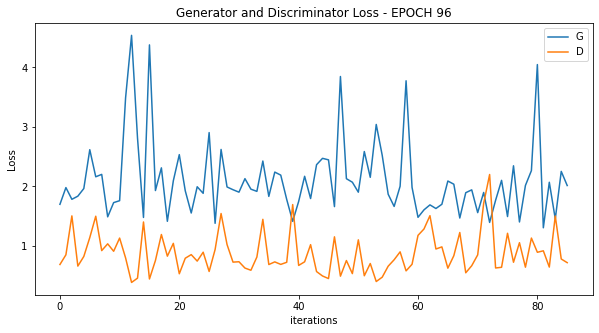

  0%|          | 0/86 [00:00<?, ?it/s]

[98/100][43/86] Loss_D: 0.6664 Loss_G: 2.6990 D(x): 0.5825 D(G(z)): 0.0510 / 0.0694
[98/100][86/86] Loss_D: 0.6017 Loss_G: 1.8235 D(x): 0.6886 D(G(z)): 0.1125 / 0.1487


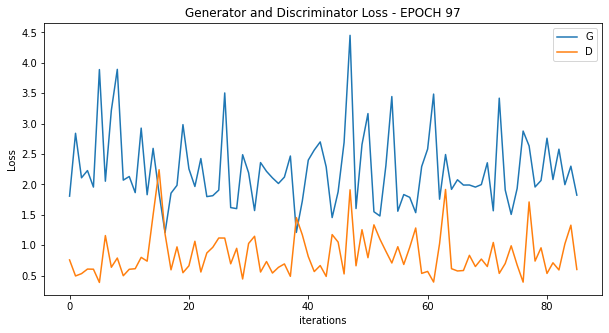

  0%|          | 0/86 [00:00<?, ?it/s]

[99/100][43/86] Loss_D: 0.6385 Loss_G: 3.1253 D(x): 0.5699 D(G(z)): 0.0185 / 0.0360
[99/100][86/86] Loss_D: 0.7741 Loss_G: 2.2499 D(x): 0.5118 D(G(z)): 0.0689 / 0.0935


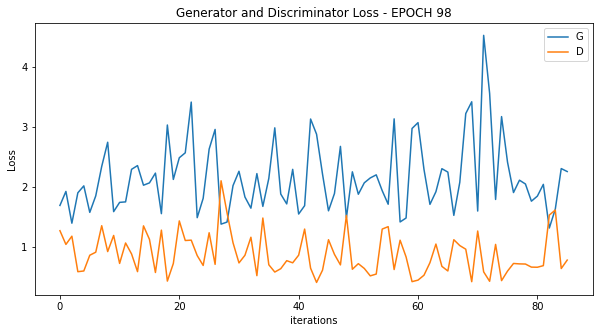

  0%|          | 0/86 [00:00<?, ?it/s]

[100/100][43/86] Loss_D: 1.0169 Loss_G: 1.7375 D(x): 0.5486 D(G(z)): 0.2916 / 0.1673
[100/100][86/86] Loss_D: 0.9380 Loss_G: 2.0700 D(x): 0.8716 D(G(z)): 0.4302 / 0.1163


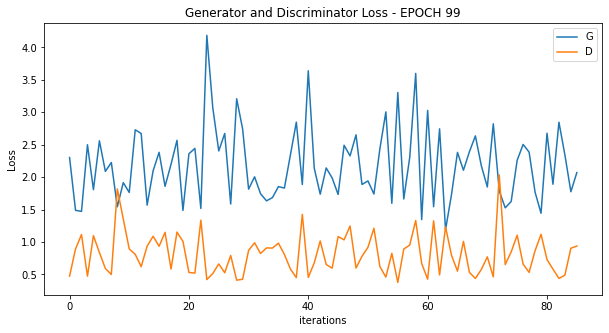

In [20]:
for epoch in range(epochs):
    
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)
    
#             valid_image = netG(fixed_noise)